# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 25.09.2022

Мягкий дедлайн: 23:59MSK 10.10.2022

Жесткий дедлайн: 23:59MSK 18.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
# !pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
df = pd.read_csv('train.csv')
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [6]:
df = df.drop('dropoff_datetime', axis=1)
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  
0                  N            455  
1                  N            663  
2                  N           2124  
3                  N            429  
4                  N            435

In [7]:
print('Shape:', df.shape)

Shape: (1458644, 10)


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

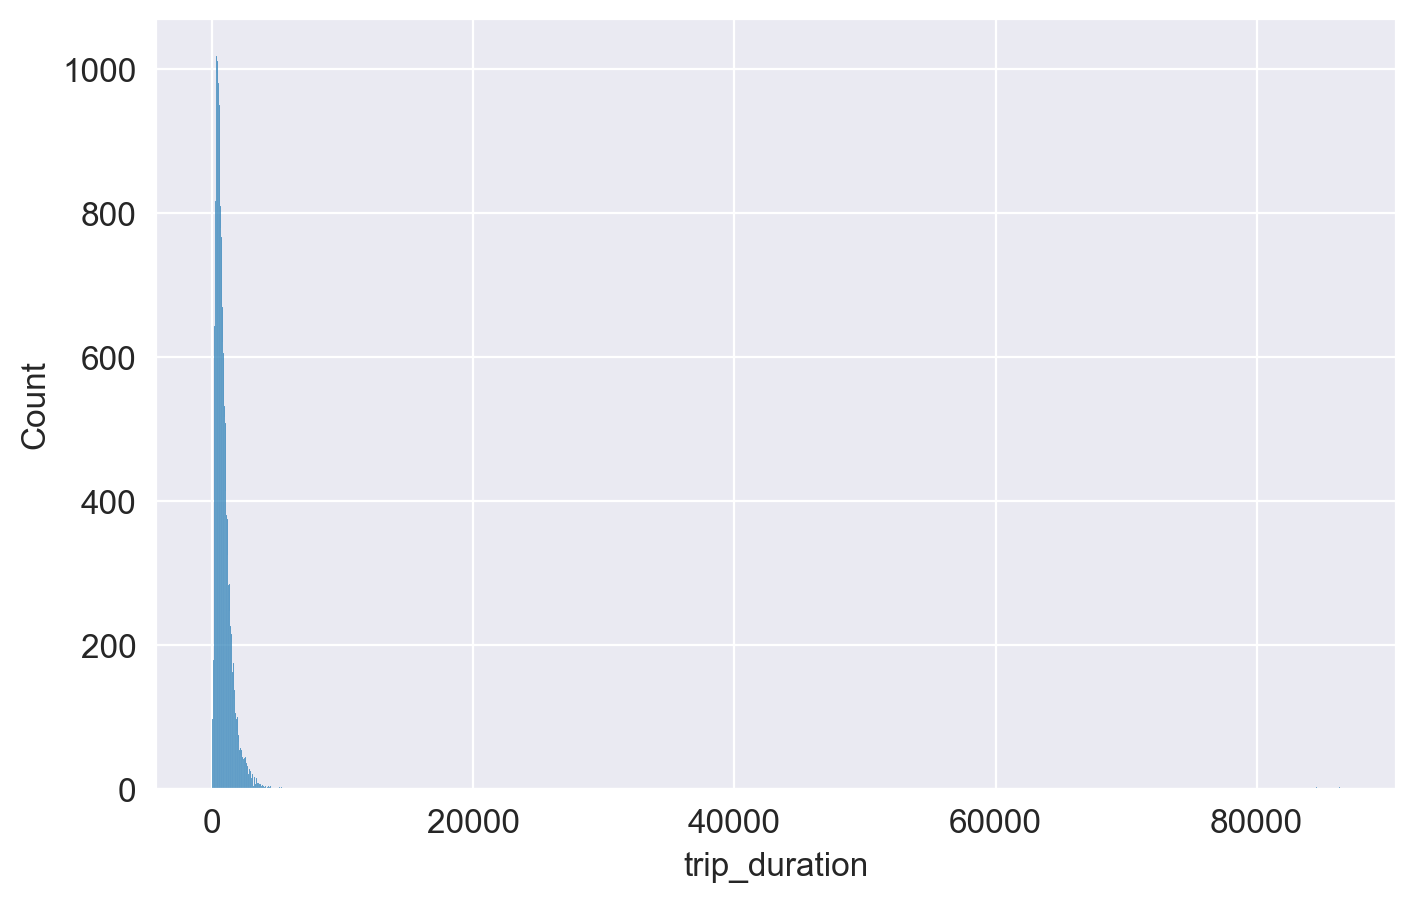

In [8]:
sns.histplot(data=df[:20000], x='trip_duration')
plt.show()

Выбросы не дают построить адекватное распределение
Ограничим максимально возможную длину поездки при построении


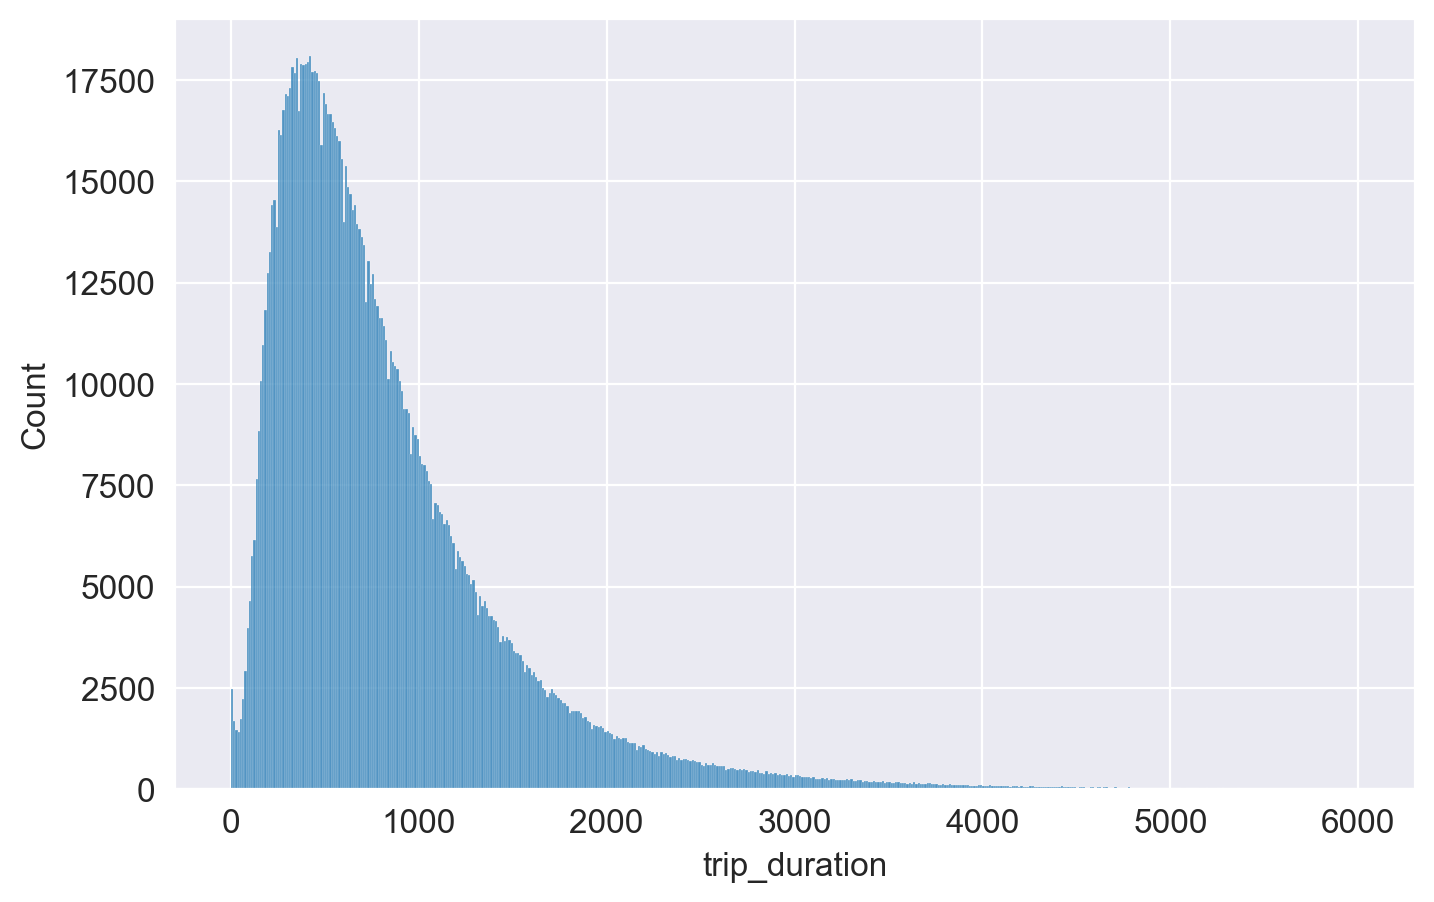

In [9]:
sns.histplot(data=df[df['trip_duration'] < 6000], x='trip_duration')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?
**Ответ**: Гистограмма очень сильно напоминает логнормальное распределение
Кроме того, есть неадекватные выбросы с правой стороны, которые изначально не позволили построить гистограмму


В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?
**Ответ**: На семинарах обсуждалось, что под различные распределения таргета определенные функции потерь показывают себя лучше остальных. Так, для нормального распределения лучше подходит MSE, а для логнормального, логично предположить, лучше подходит RMSLE, в которой есть логарифм.
Помимо этого, RMSLE сильнее штрафует за недооцененные предсказания, что может быть важным в бизнесе такси

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: $\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$
 Наш таргет теперь такой: $\hat{y}_i = \log{(y_i + 1)}$
 Так как мы предсказываем такой измененный таргет, то выход модели будет изменен таким же образом, относительно старого выхода и
 $\hat{a}(x_i) = \log{(a(x_i) + 1)}$
 Перепишем RMSLE, проведя такую замену: $\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2} = \text{RMSE}(X, \hat{y}, \hat{a})$
 Получается, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации RMSE для модели $\hat{a}$
 Но оптимизация RMSE эквивалентра оптимизации MSE для той же модели: $f(x) = \sqrt{x}$ - монотоннао убывающая функция. Если мы возьмем корень от любого значения функции MSE, то относительный порядок этих значений не поменяется $MSE(a) > MSE(b) \Longleftrightarrow  RMSE(a) > RMSE(b)$
 Это означает, что оптимизация RMSE эквивалентра оптимизации MSE.
 Но выше показали, что наша задача эквивалента оптимизации RMSE, значит оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [10]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df = df.drop('trip_duration', axis=1)
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  log_trip_duration  
0                  N           6.122493  
1                  N           6.498282  
2                  N           7.661527  
3                  N           6.063785  
4                  N           6.077642

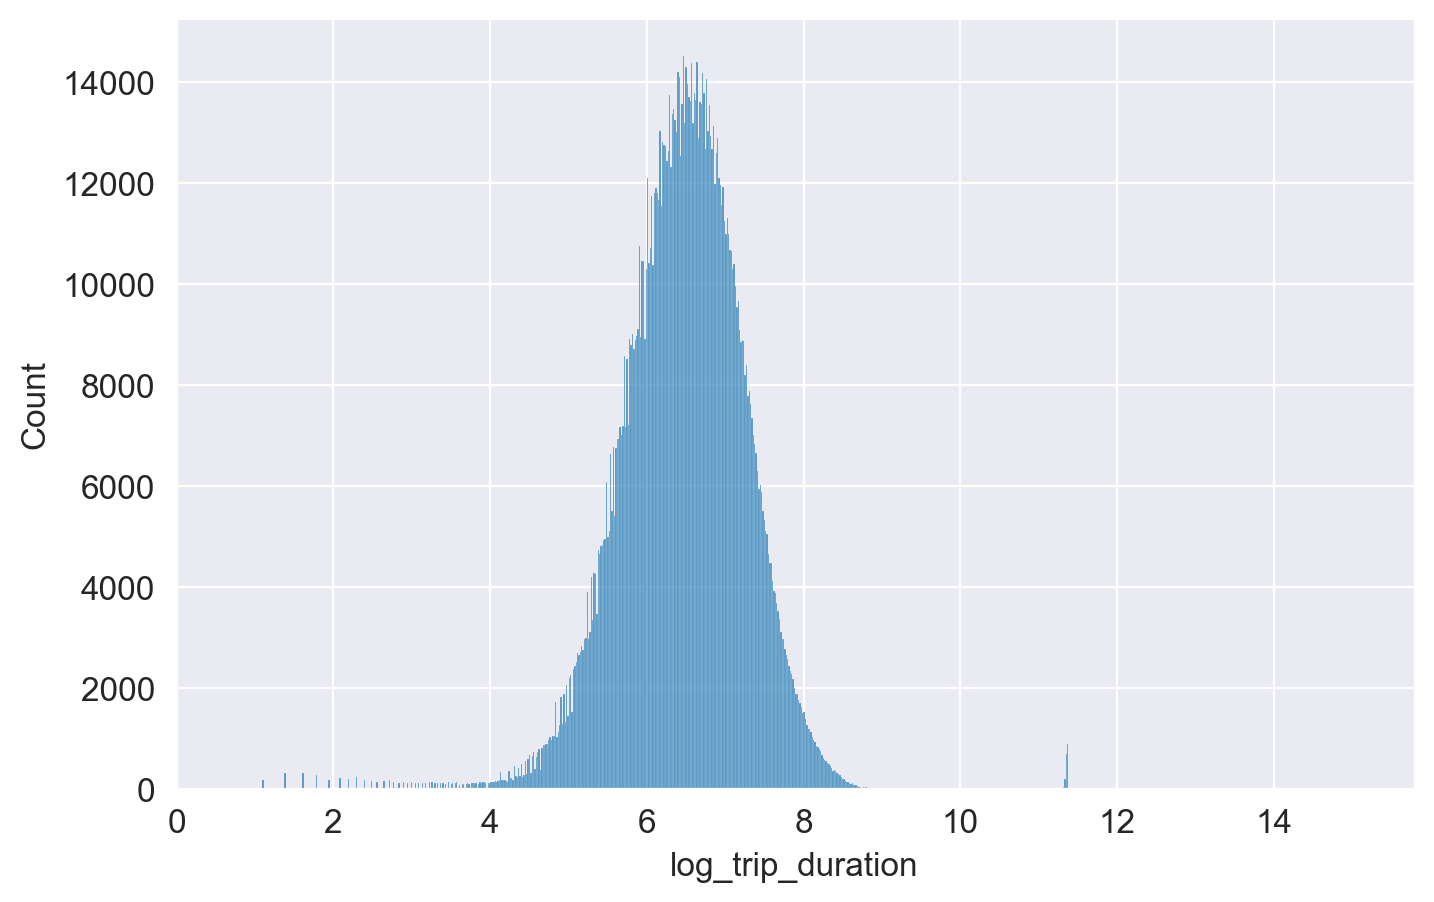

In [11]:
sns.histplot(data=df, x='log_trip_duration')
plt.show()

Стало похоже на нормальное распределение

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

Лучший константный прогноз для MSE - среднее значений таргета

In [12]:
from sklearn.metrics import mean_squared_error

best_const = np.mean(df['log_trip_duration'])
best_mse = mean_squared_error(df['log_trip_duration'], np.full((df.shape[0], 1), best_const))
print('Best const =', best_const, ' best MSE =', best_mse)

Best const = 6.466978409297406  best MSE = 0.6332327625405553


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [13]:
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  log_trip_duration  
0                  N           6.122493  
1                  N           6.498282  
2                  N           7.661527  
3                  N           6.063785  
4                  N           6.077642

In [14]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
log_trip_duration            float64
dtype: object

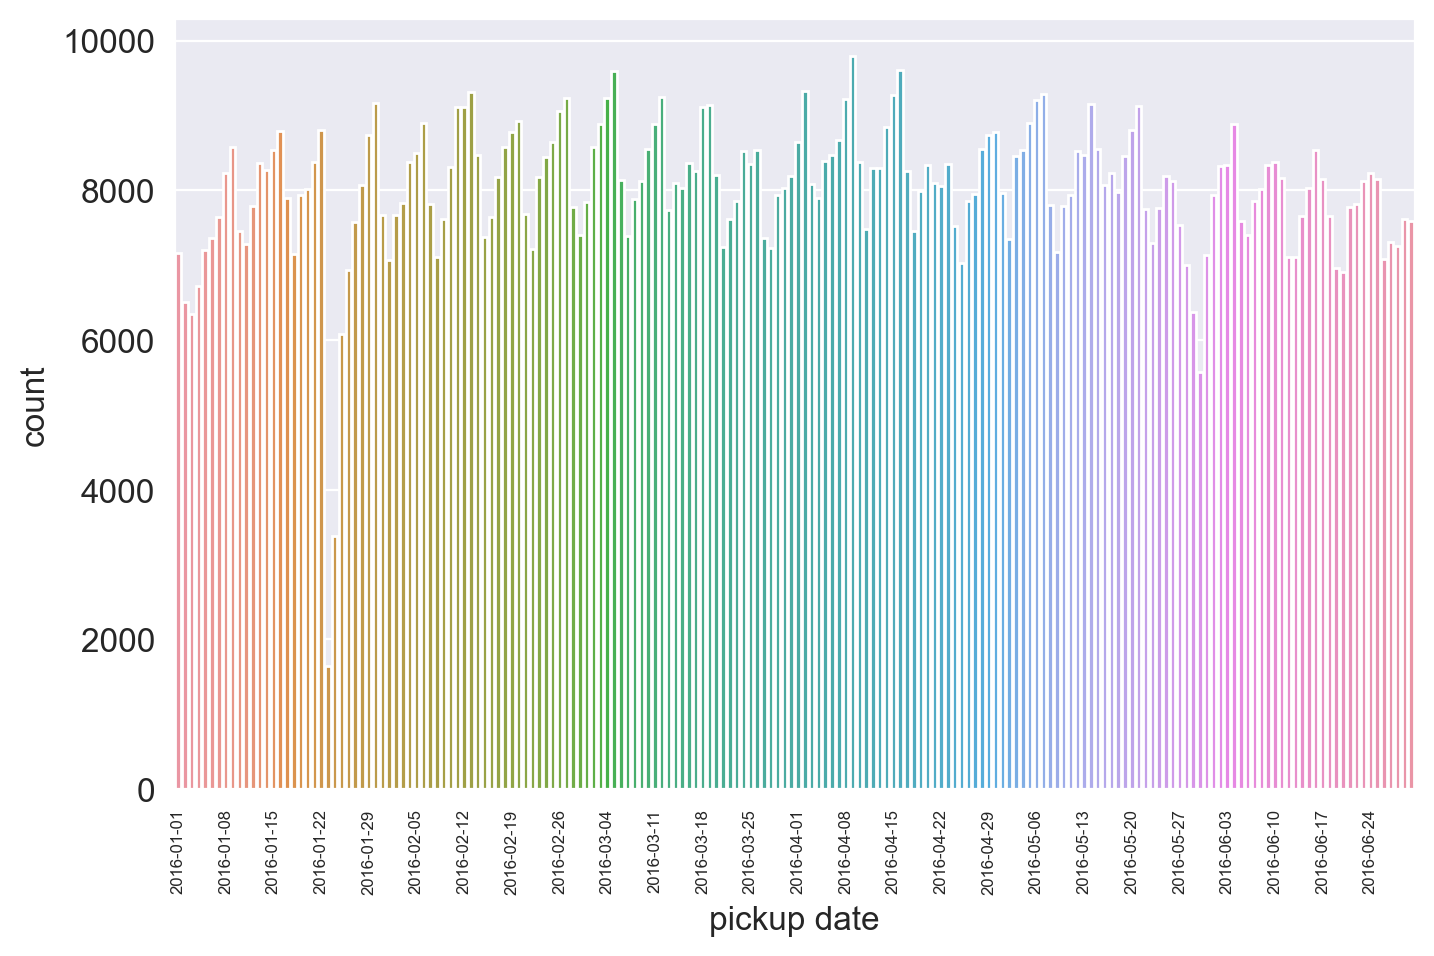

In [15]:
import matplotlib.dates as mdates

plt.rc('xtick', labelsize=6)
plt.xticks(rotation=90)

g = sns.countplot(x=df['pickup_datetime'].dt.date.sort_values())
g.set_xlabel('pickup date')
g.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=3, interval=1))
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.
**Ответ**:ВАШИНГТОН, 23 янв 2016 — РИА Новости, Григорий Дубовицкий. Губернатор штата Нью-Йорк Эндрю Куомо запретил автомобильное движение в городе Нью-Йорк из-за снежной бури "Джонас", которая накрыла мегаполис в субботу.
May 30, 2016 - День поминовения в Нью-Йорке
Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

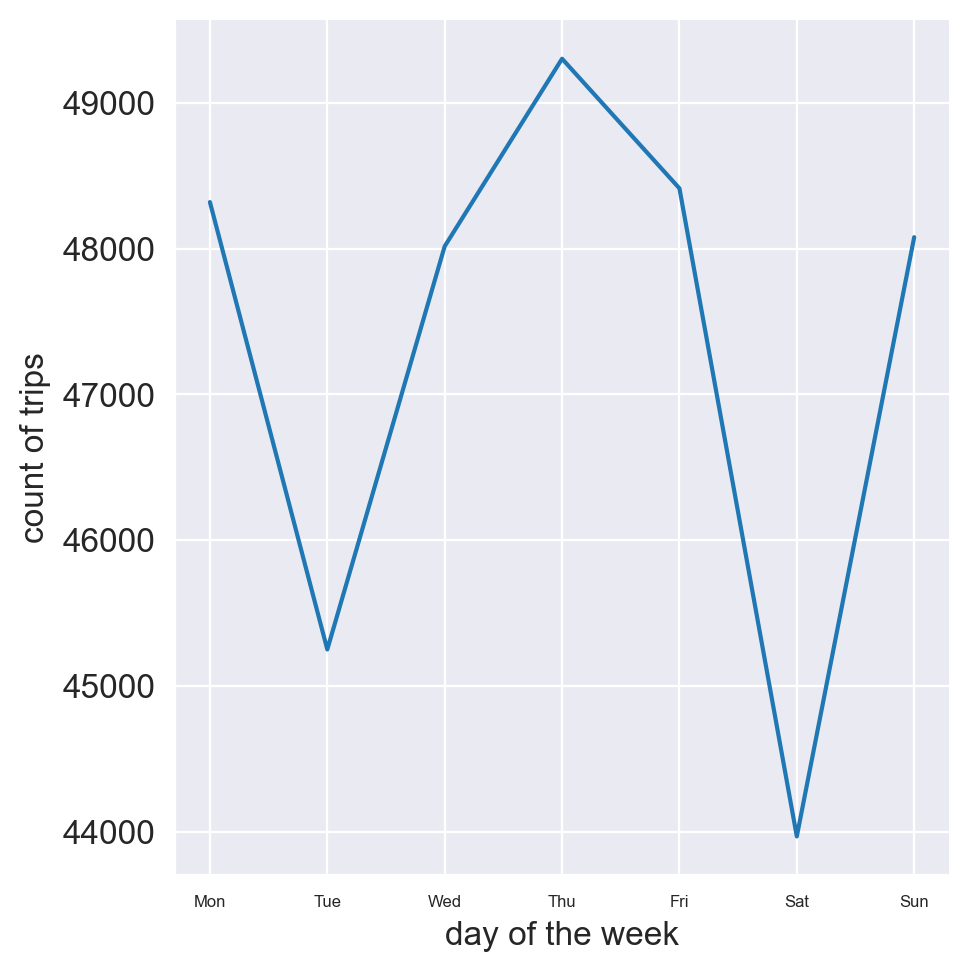

In [16]:
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.relplot(x=df['pickup_datetime'].dt.weekday, y=df.groupby(df['pickup_datetime'].dt.day)['id'].count(), kind='line', err_style=None)

plt.xticks(ticks=range(len(days_of_week)), labels=days_of_week)
g.set_xlabels('day of the week')
g.set_ylabels('count of trips')

plt.show()

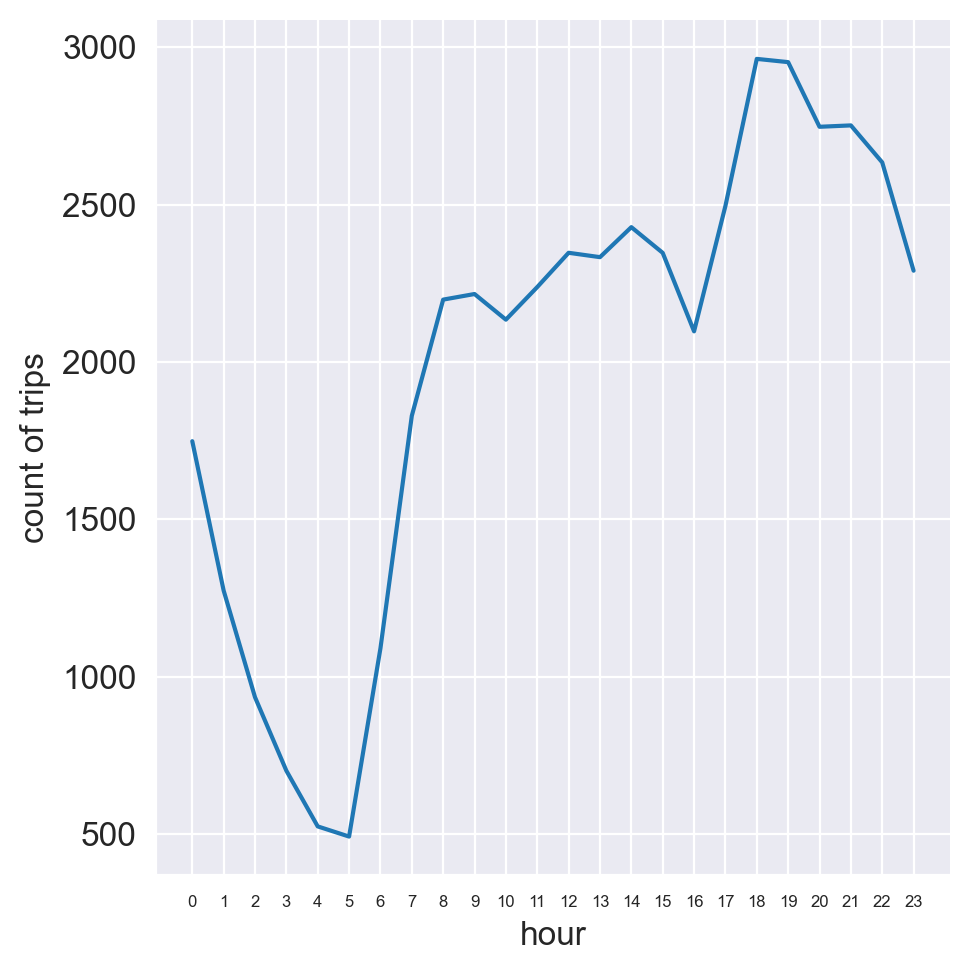

In [17]:
g = sns.relplot(x=df['pickup_datetime'].dt.hour,
                y=df.groupby([df['pickup_datetime'].dt.day, df['pickup_datetime'].dt.hour])['id'].transform('count'),
                kind='line', err_style=None)

plt.xticks(ticks=range(24))
g.set_xlabels('hour')
g.set_ylabels('count of trips')

plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

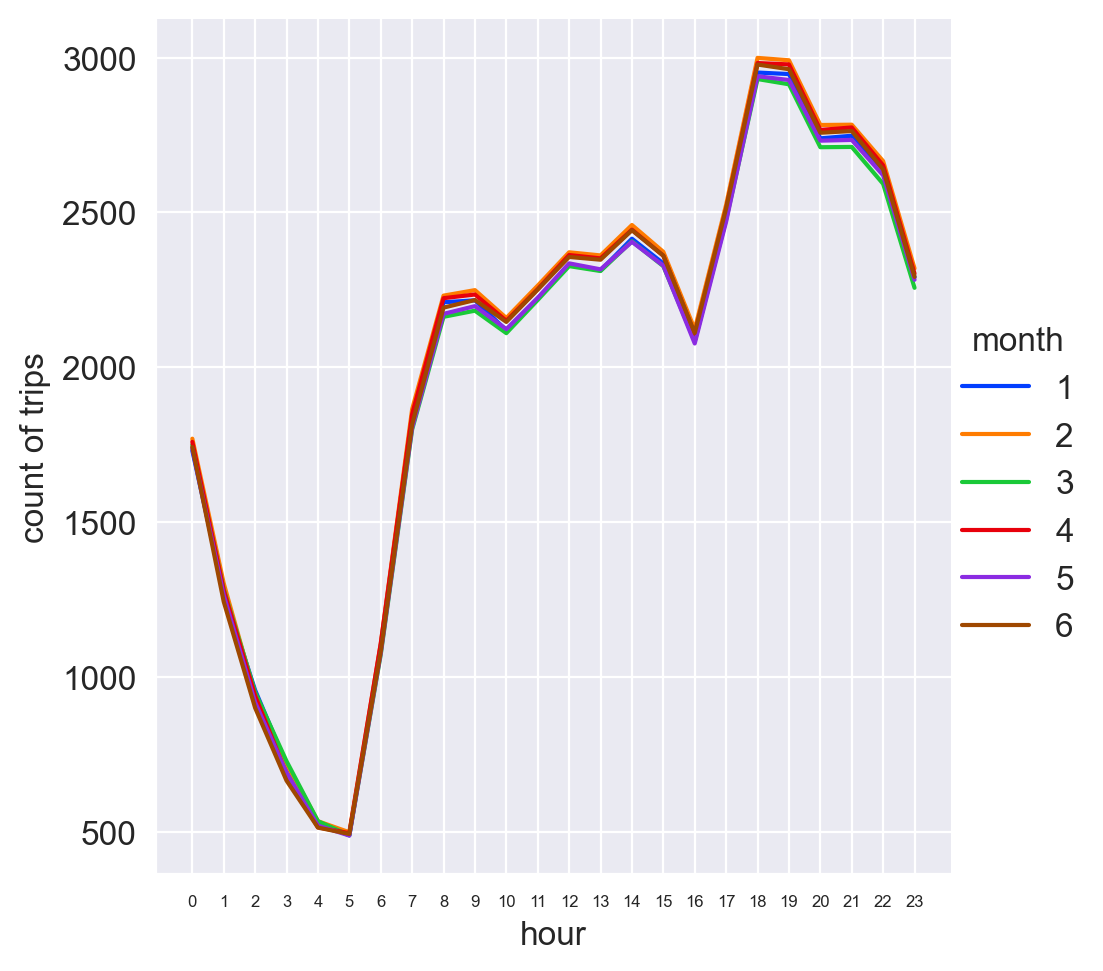

In [18]:
g = sns.relplot(x=df['pickup_datetime'].dt.hour,
                y=df.groupby([df['pickup_datetime'].dt.day, df['pickup_datetime'].dt.hour])['id'].transform('count'),
                hue=df['pickup_datetime'].rename('month').dt.month, palette='bright', kind='line', err_style=None)

plt.xticks(ticks=range(24))
g.set_xlabels('hour')
g.set_ylabels('count of trips')

plt.show()

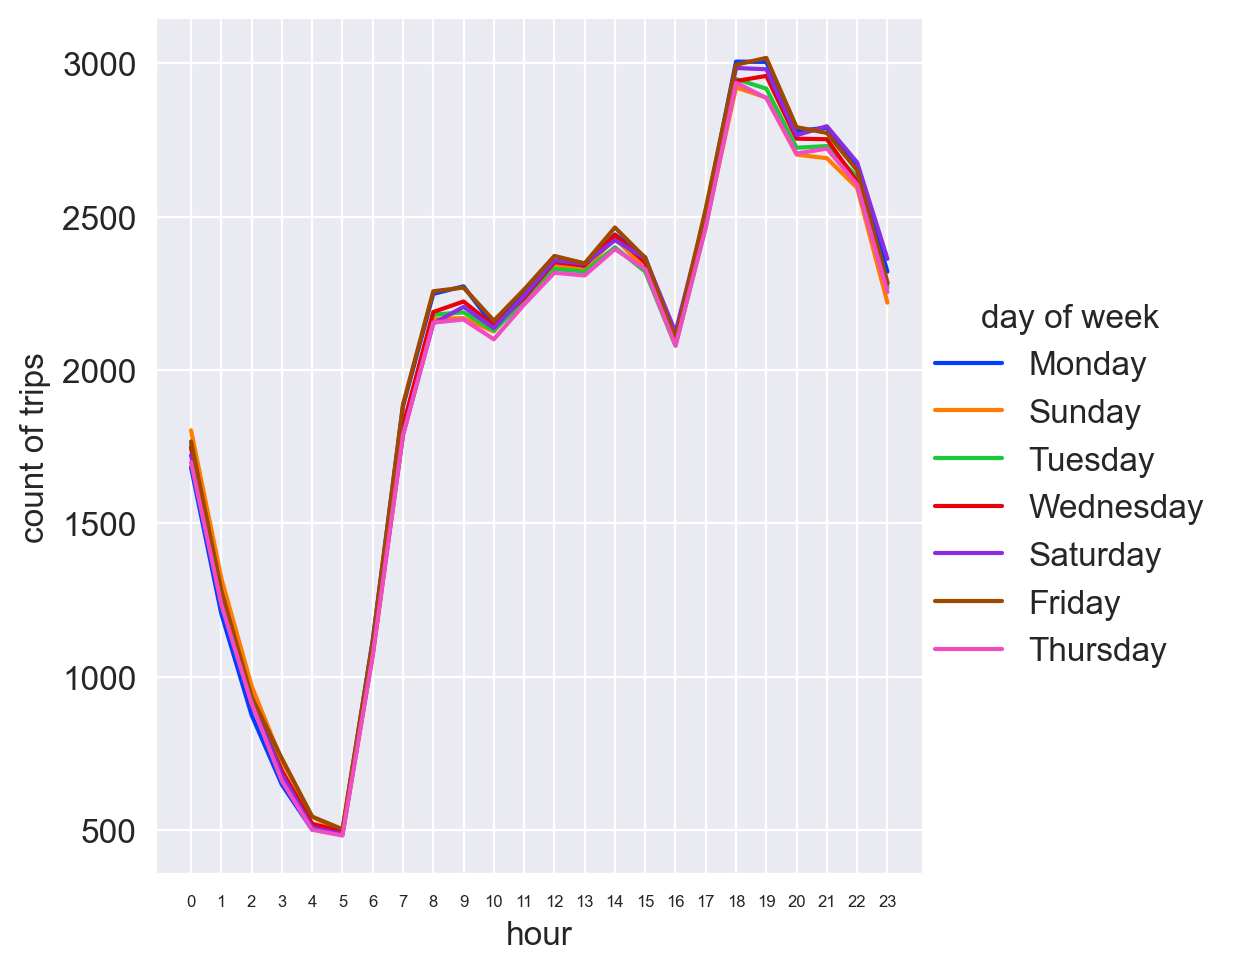

In [19]:
g = sns.relplot(x=df['pickup_datetime'].dt.hour,
                y=df.groupby([df['pickup_datetime'].dt.day, df['pickup_datetime'].dt.hour])['id'].transform('count'),
                hue=df['pickup_datetime'].rename('day of week').dt.day_name(), palette='bright', kind='line', err_style=None)

plt.xticks(ticks=range(24))
g.set_xlabels('hour')
g.set_ylabels('count of trips')

plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?
**Ответ**: Чаще всего поездки совершаются в 18 и 19 часов (люди едут с работы), потом их число плавно уменьшается до миниума в 5 часов и после резко поднимается к 8 часам. С 8 до 15 их число примерно на одном уровне. Это связано с рабочим графиком. Ну а ночью люди спят)
Меньше всего поездок в субботу, так как это первый выходной, все отдыхают, и во вторник (что немного неожиданно).
 идно, что от месяца и дня недели число поездки в тот или иной час почти не меняется (по последним двум графикам)

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [20]:
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  log_trip_duration  
0                  N           6.122493  
1                  N           6.498282  
2                  N           7.661527  
3                  N           6.063785  
4                  N           6.077642

In [21]:
from sklearn.model_selection import train_test_split

np.random.seed(38)

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'id':'store_and_fwd_flag'],
                                                    df.loc[:, 'log_trip_duration'], test_size=0.3, train_size=0.7)
X_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1183110  id2786385          1 2016-05-13 18:10:09                1   
1415769  id3037797          1 2016-03-20 02:03:36                2   
940140   id2349575          2 2016-01-07 22:09:04                1   
1263734  id3905543          1 2016-05-31 15:11:44                1   
145592   id1627565          1 2016-04-12 11:21:10                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1183110        -73.987053        40.725471         -73.999504   
1415769        -73.971756        40.761894         -73.982124   
940140         -73.986534        40.742668         -74.007301   
1263734        -73.982246        40.768192         -73.976479   
145592         -73.963974        40.775284         -73.960594   

         dropoff_latitude store_and_fwd_flag  
1183110         40.728611                  N  
1415769         40.755253                  N  
940140          40.741310                  N  
1263734         40.785740                  N  
145592          40.780769                  N

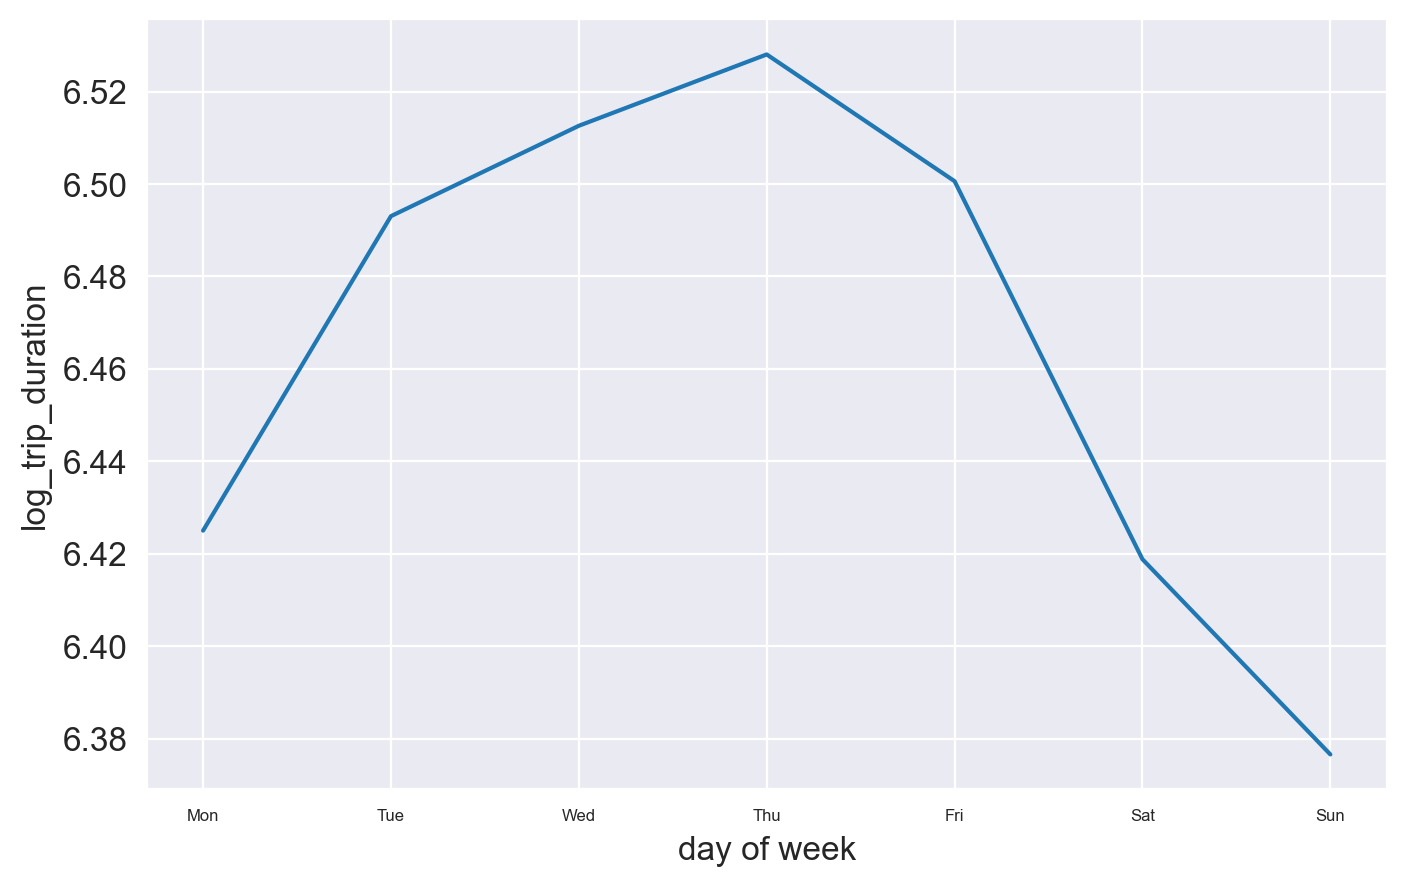

In [22]:
import matplotlib.ticker as plticker

days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.lineplot(x=X_train['pickup_datetime'].rename('day of week').dt.weekday, y=y_train, err_style=None)
plt.xticks(ticks=range(len(days_of_week)), labels=days_of_week)

g.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
plt.show()

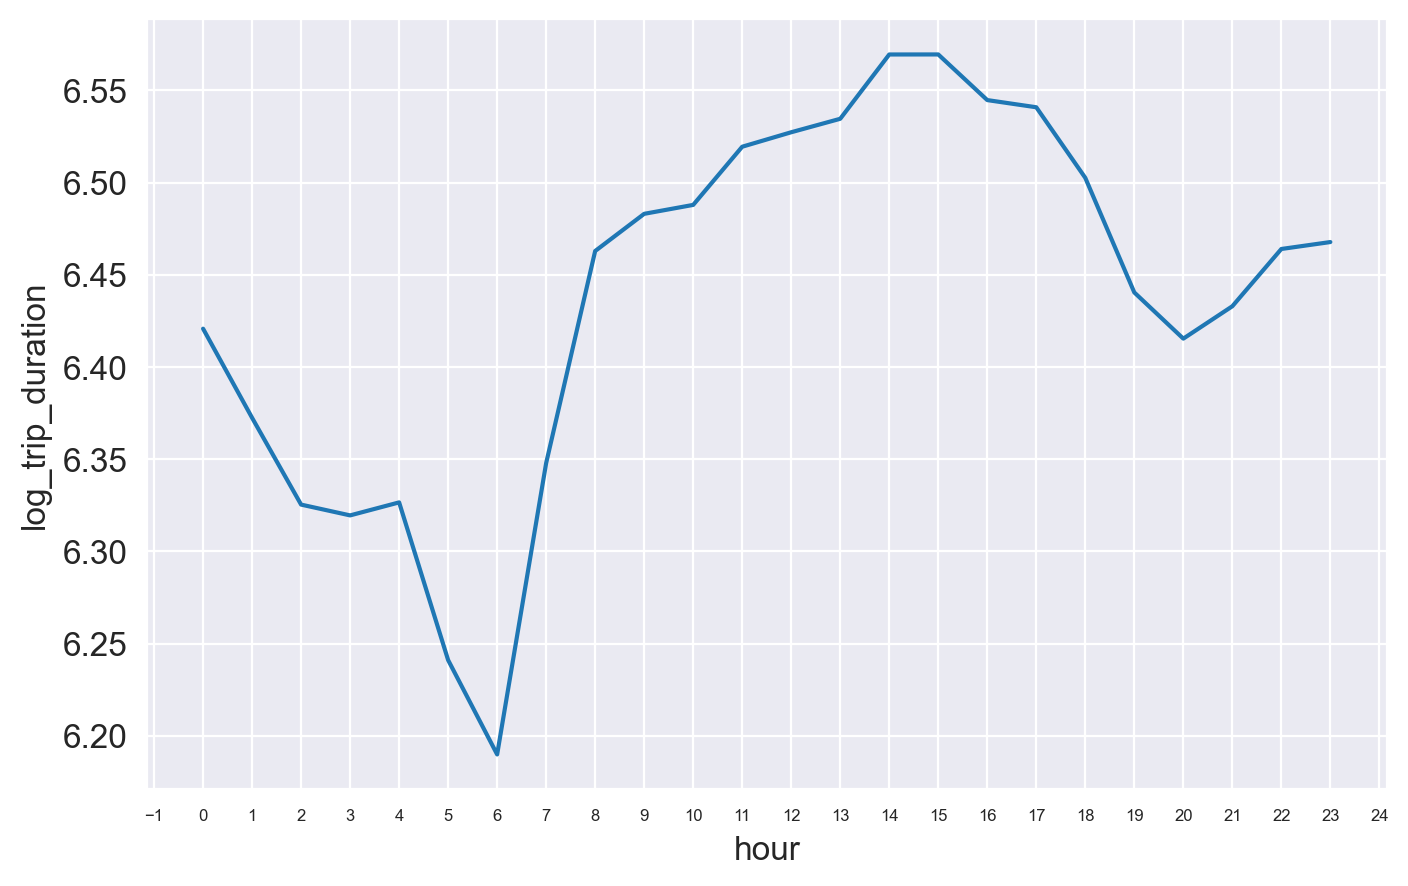

In [23]:
g = sns.lineplot(x=X_train['pickup_datetime'].rename('hour').dt.hour, y=y_train, err_style=None)
g.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
plt.show()

In [24]:
X_train['pickup_datetime'].median()

Timestamp('2016-04-01 18:00:14')

C:\Users\dm1tr\AppData\Local\Temp\ipykernel_8264\2627156490.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\dm1tr\AppData\Local\Temp\ipykernel_8264\2627156490.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


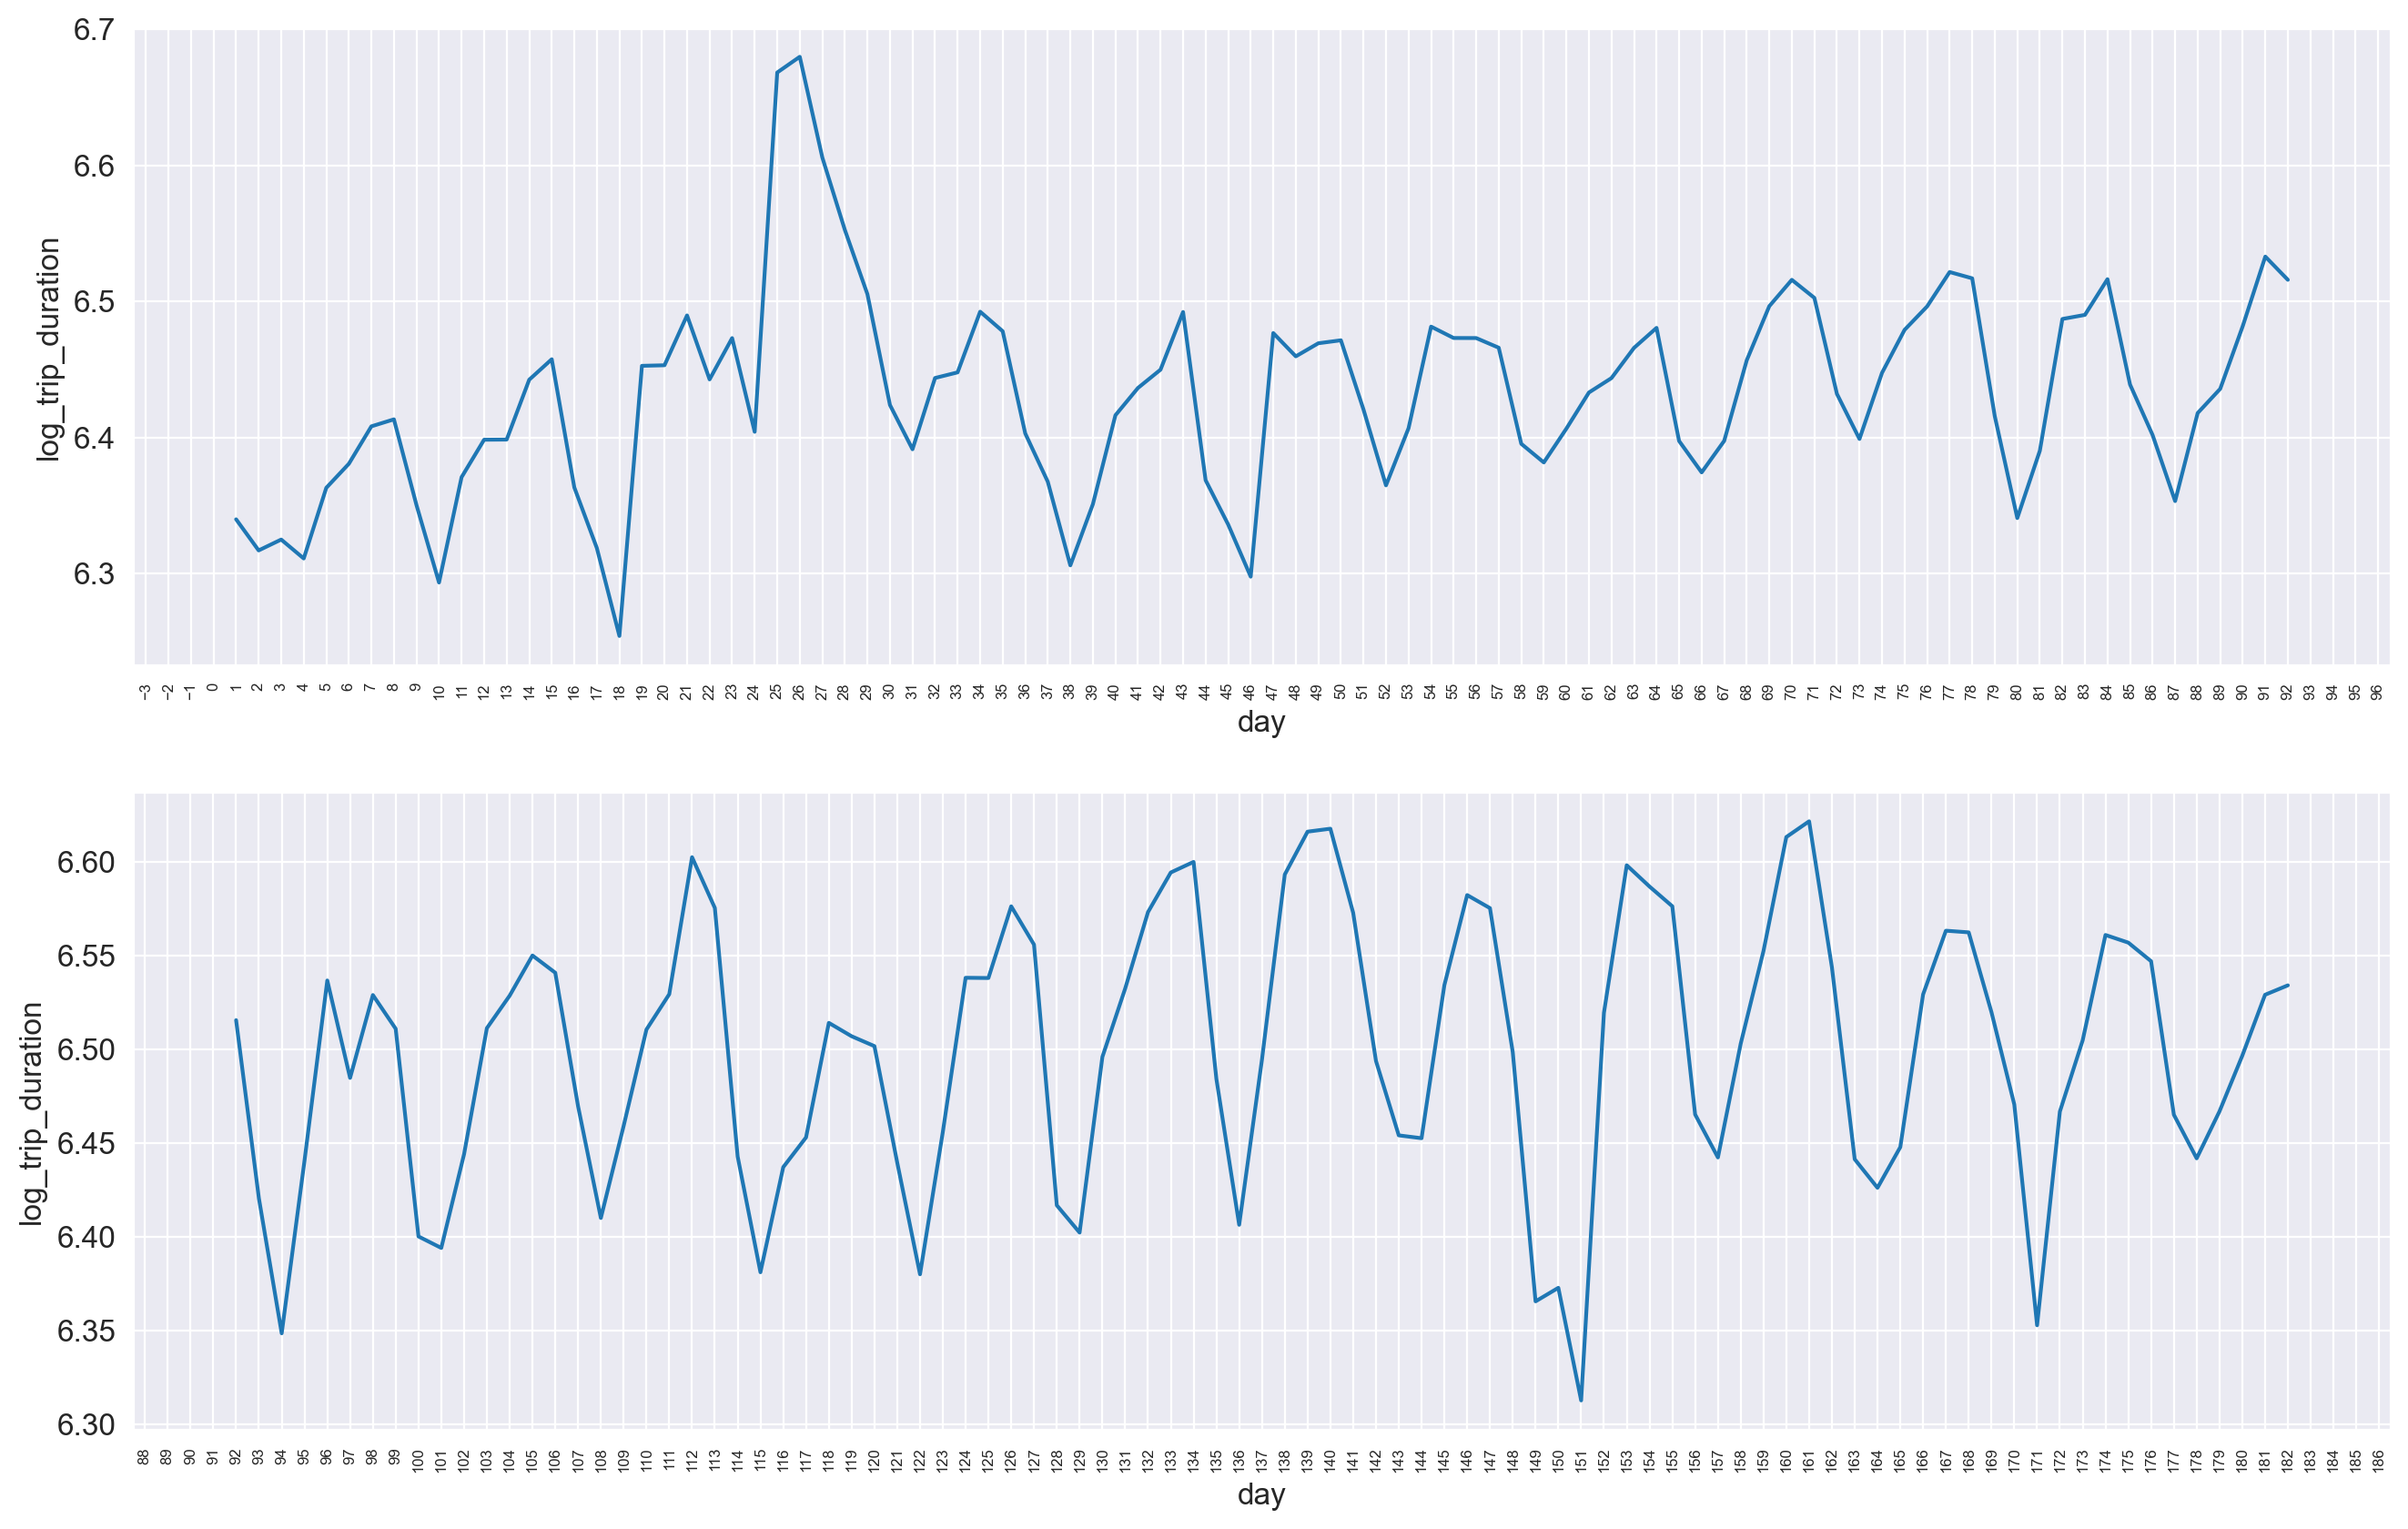

In [25]:
fig, axes = plt.subplots(2, figsize=(16, 10))
plt.xticks(rotation=90)

g = sns.lineplot(x=X_train[X_train['pickup_datetime'] < '2016-04-02']['pickup_datetime'].rename('day').dt.dayofyear,
                 y=y_train[X_train['pickup_datetime'] < '2016-04-02'], err_style=None, ax=axes[0])
g.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

g = sns.lineplot(x=X_train[X_train['pickup_datetime'] > '2016-04-01']['pickup_datetime'].rename('day').dt.dayofyear,
                 y=y_train[X_train['pickup_datetime'] > '2016-04-01'], err_style=None, ax=axes[1])
g.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?
**Ответ**: Графики от дня недели не очень похожи, так как в таргете нет провала в вторник. А вот от времени суток - очень похожи. Таргет в аномальные периоды сильно ниже обычного. На последнем графике наблюдается недельный тренд

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [26]:
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  log_trip_duration  
0                  N           6.122493  
1                  N           6.498282  
2                  N           7.661527  
3                  N           6.063785  
4                  N           6.077642

In [27]:
anomal_first = ['2016-01-16', '2016-01-17', '2016-01-18']
anomal_second = ['2016-05-29', '2016-05-30']


def add_dt_features(X):
    X['weekday'] = X['pickup_datetime'].dt.weekday
    X['month'] = X['pickup_datetime'].dt.month
    X['hour'] = X['pickup_datetime'].dt.hour
    X['is_anomal_first'] = X['pickup_datetime'].dt.date.isin(pd.to_datetime(anomal_first).date)
    X['is_anomal_second'] = X['pickup_datetime'].dt.date.isin(pd.to_datetime(anomal_second).date)
    X['day_of_year'] = X['pickup_datetime'].dt.dayofyear


add_dt_features(X_train)
add_dt_features(X_test)

X_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1183110  id2786385          1 2016-05-13 18:10:09                1   
1415769  id3037797          1 2016-03-20 02:03:36                2   
940140   id2349575          2 2016-01-07 22:09:04                1   
1263734  id3905543          1 2016-05-31 15:11:44                1   
145592   id1627565          1 2016-04-12 11:21:10                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1183110        -73.987053        40.725471         -73.999504   
1415769        -73.971756        40.761894         -73.982124   
940140         -73.986534        40.742668         -74.007301   
1263734        -73.982246        40.768192         -73.976479   
145592         -73.963974        40.775284         -73.960594   

         dropoff_latitude store_and_fwd_flag  weekday  month  hour  \
1183110         40.728611                  N        4      5    18   
1415769         40.755253                  N        6      3     2   
940140          40.741310                  N        3      1    22   
1263734         40.785740                  N        1      5    15   
145592          40.780769                  N        1      4    11   

         is_anomal_first  is_anomal_second  day_of_year  
1183110            False             False          134  
1415769            False             False           80  
940140             False             False            7  
1263734            False             False          152  
145592             False             False          103

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?
**Ответ**: Категориальные: vendor_id (тк это ассоциация с provider'om), store_and_fwd_flag - бинарный индикатор, weekday - 7 дней в неделе - 7 классов, month, day_of_year и hour - аналогично, is_anomal_first и is_anomal_second - бинарный индикатор
Численные: passenger_count - число пассажиров, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude - координаты старта и конца поездки
id - не будем использовать, так как их огромное множество и вряд ли id несет много информации в себе (за исключением редких случаем разве что)
pickup_datetime - не будем использовать, так как на его основе создали много признаков и теперь этот признак - комбинация других, созданных нами (кроме того, как засунуть дату в модель? только если в timestamp конвертнуть)


**Далее при кодировании буду намеренно много признаков (с виду числовых) относить к категориальным. Это нужно чтобы сделать OHE получить логичную интерпретацию. Например, если день недели сделать числовым, то возникает интерпретация линейной модели в виде - чем больше день недели, тем дольше / короче поездка, что сранно**

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [29]:
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


def make_first_pipeline(numeric_features, categorical_features, reg=1.0):
    categorical_transformer = Pipeline(steps=[
        ('ohe', OneHotEncoder(handle_unknown='ignore'))])
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    ridge = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regression', Ridge(alpha=reg))])
    return ridge

In [30]:
numeric_features = []
categorical_features = ['weekday', 'month', 'hour', 'is_anomal_first', 'is_anomal_second', 'day_of_year']
ridge = make_first_pipeline(numeric_features, categorical_features)

In [31]:
ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['weekday', 'month', 'hour',
                                                   'is_anomal_first',
                                                   'is_anomal_second',
                                                   'day_of_year'])])),
                ('regression', Ridge())])

In [32]:
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('First Ridge MSE:', mse)

First Ridge MSE: 0.6204900959763631


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [33]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [34]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [35]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?
**Ответ**: Видимо, два аэропорта

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [36]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))

    return h


def add_haversine(X):
    X['haversine'] = haversine_array(X['pickup_latitude'], X['pickup_longitude'], X['dropoff_latitude'],
                                     X['dropoff_longitude'])

In [37]:
add_haversine(X_train)
add_haversine(X_test)
X_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1183110  id2786385          1 2016-05-13 18:10:09                1   
1415769  id3037797          1 2016-03-20 02:03:36                2   
940140   id2349575          2 2016-01-07 22:09:04                1   
1263734  id3905543          1 2016-05-31 15:11:44                1   
145592   id1627565          1 2016-04-12 11:21:10                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1183110        -73.987053        40.725471         -73.999504   
1415769        -73.971756        40.761894         -73.982124   
940140         -73.986534        40.742668         -74.007301   
1263734        -73.982246        40.768192         -73.976479   
145592         -73.963974        40.775284         -73.960594   

         dropoff_latitude store_and_fwd_flag  weekday  month  hour  \
1183110         40.728611                  N        4      5    18   
1415769         40.755253                  N        6      3     2   
940140          40.741310                  N        3      1    22   
1263734         40.785740                  N        1      5    15   
145592          40.780769                  N        1      4    11   

         is_anomal_first  is_anomal_second  day_of_year  haversine  
1183110            False             False          134   1.105768  
1415769            False             False           80   1.143679  
940140             False             False            7   1.756091  
1263734            False             False          152   2.010740  
145592             False             False          103   0.673087

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [38]:
def add_haversine_log(X):
    X['haversine_log'] = np.log1p(X['haversine'])

In [39]:
add_haversine_log(X_train)
add_haversine_log(X_test)
X_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1183110  id2786385          1 2016-05-13 18:10:09                1   
1415769  id3037797          1 2016-03-20 02:03:36                2   
940140   id2349575          2 2016-01-07 22:09:04                1   
1263734  id3905543          1 2016-05-31 15:11:44                1   
145592   id1627565          1 2016-04-12 11:21:10                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1183110        -73.987053        40.725471         -73.999504   
1415769        -73.971756        40.761894         -73.982124   
940140         -73.986534        40.742668         -74.007301   
1263734        -73.982246        40.768192         -73.976479   
145592         -73.963974        40.775284         -73.960594   

         dropoff_latitude store_and_fwd_flag  weekday  month  hour  \
1183110         40.728611                  N        4      5    18   
1415769         40.755253                  N        6      3     2   
940140          40.741310                  N        3      1    22   
1263734         40.785740                  N        1      5    15   
145592          40.780769                  N        1      4    11   

         is_anomal_first  is_anomal_second  day_of_year  haversine  \
1183110            False             False          134   1.105768   
1415769            False             False           80   1.143679   
940140             False             False            7   1.756091   
1263734            False             False          152   2.010740   
145592             False             False          103   0.673087   

         haversine_log  
1183110       0.744680  
1415769       0.762523  
940140        1.013813  
1263734       1.102186  
145592        0.514670

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [40]:
print('Hoversine - target corrcoef:', np.corrcoef(X_train['haversine'], y_train)[0][1])
print('Hoversine - target corrcoef:', np.corrcoef(X_train['haversine_log'], y_train)[0][1])


Hoversine - target corrcoef: 0.5580885201031787
Hoversine - target corrcoef: 0.7493920043678322


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [41]:
X_train['avg_speed'] = X_train['haversine'] / y_train
X_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1183110  id2786385          1 2016-05-13 18:10:09                1   
1415769  id3037797          1 2016-03-20 02:03:36                2   
940140   id2349575          2 2016-01-07 22:09:04                1   
1263734  id3905543          1 2016-05-31 15:11:44                1   
145592   id1627565          1 2016-04-12 11:21:10                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1183110        -73.987053        40.725471         -73.999504   
1415769        -73.971756        40.761894         -73.982124   
940140         -73.986534        40.742668         -74.007301   
1263734        -73.982246        40.768192         -73.976479   
145592         -73.963974        40.775284         -73.960594   

         dropoff_latitude store_and_fwd_flag  weekday  month  hour  \
1183110         40.728611                  N        4      5    18   
1415769         40.755253                  N        6      3     2   
940140          40.741310                  N        3      1    22   
1263734         40.785740                  N        1      5    15   
145592          40.780769                  N        1      4    11   

         is_anomal_first  is_anomal_second  day_of_year  haversine  \
1183110            False             False          134   1.105768   
1415769            False             False           80   1.143679   
940140             False             False            7   1.756091   
1263734            False             False          152   2.010740   
145592             False             False          103   0.673087   

         haversine_log  avg_speed  
1183110       0.744680   0.173593  
1415769       0.762523   0.188608  
940140        1.013813   0.286316  
1263734       1.102186   0.302061  
145592        0.514670   0.112673

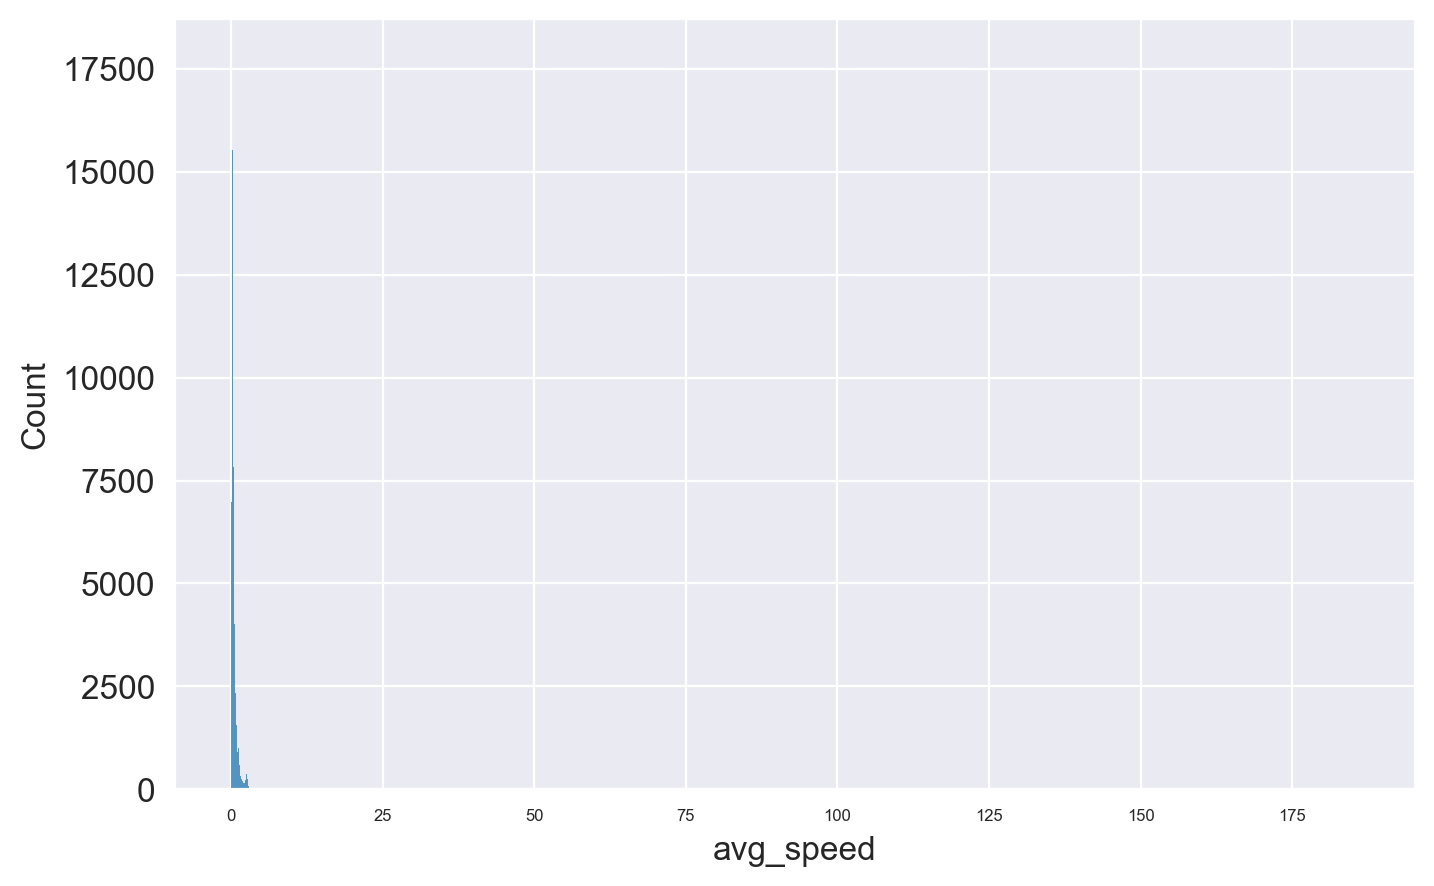

In [42]:
sns.histplot(data=X_train, x='avg_speed')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

Кажется, что 2.5 км в минуту еще +- разумно, если ехать по трассе (не знаю конечно, как в америке гоняют, но у нас звучит реально)

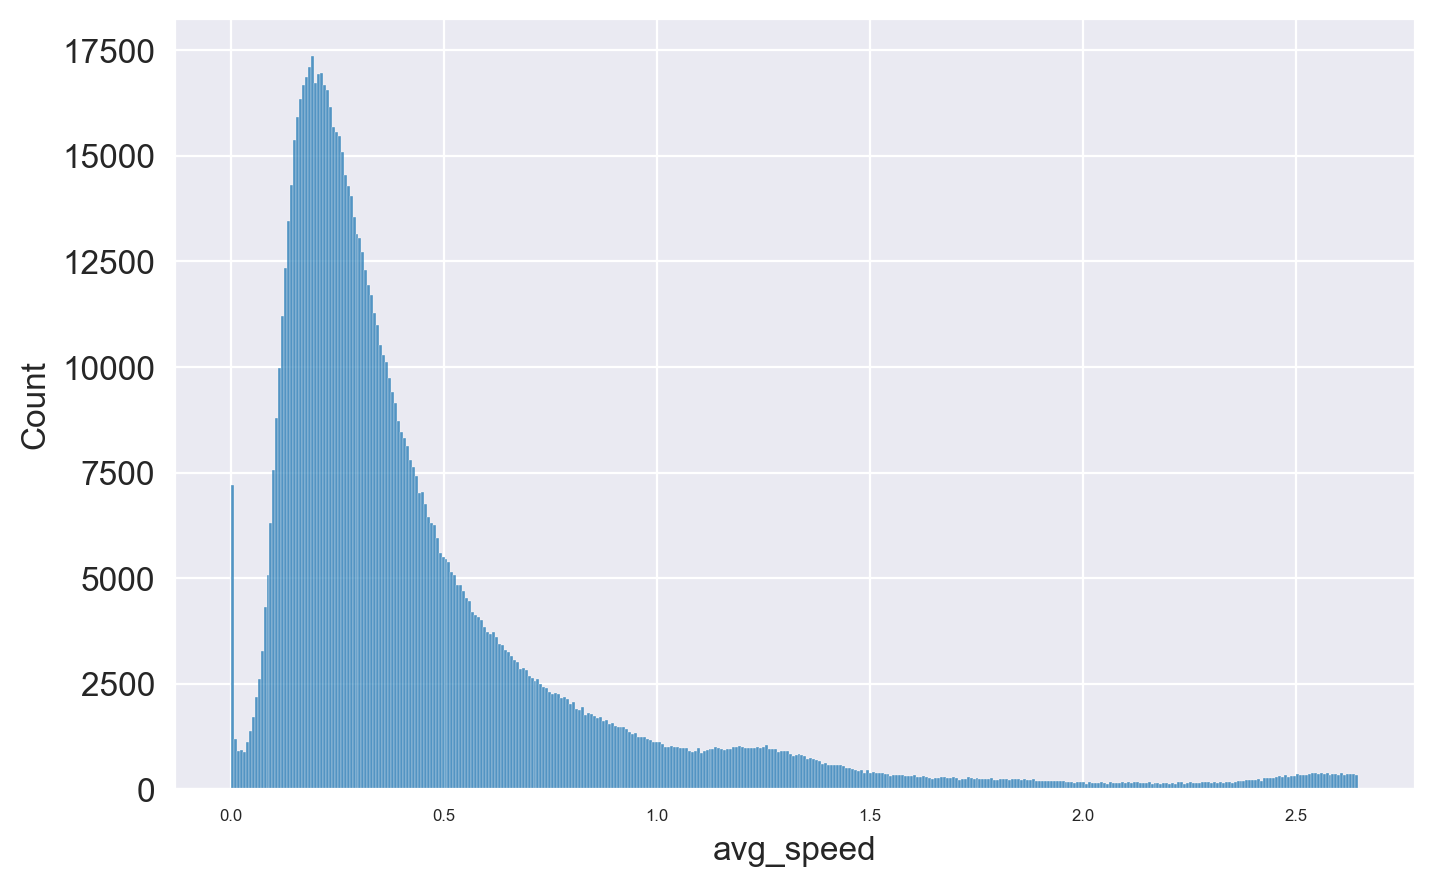

In [42]:
sns.histplot(data=X_train[X_train['avg_speed'] <= X_train['avg_speed'].quantile(0.99)], x='avg_speed')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

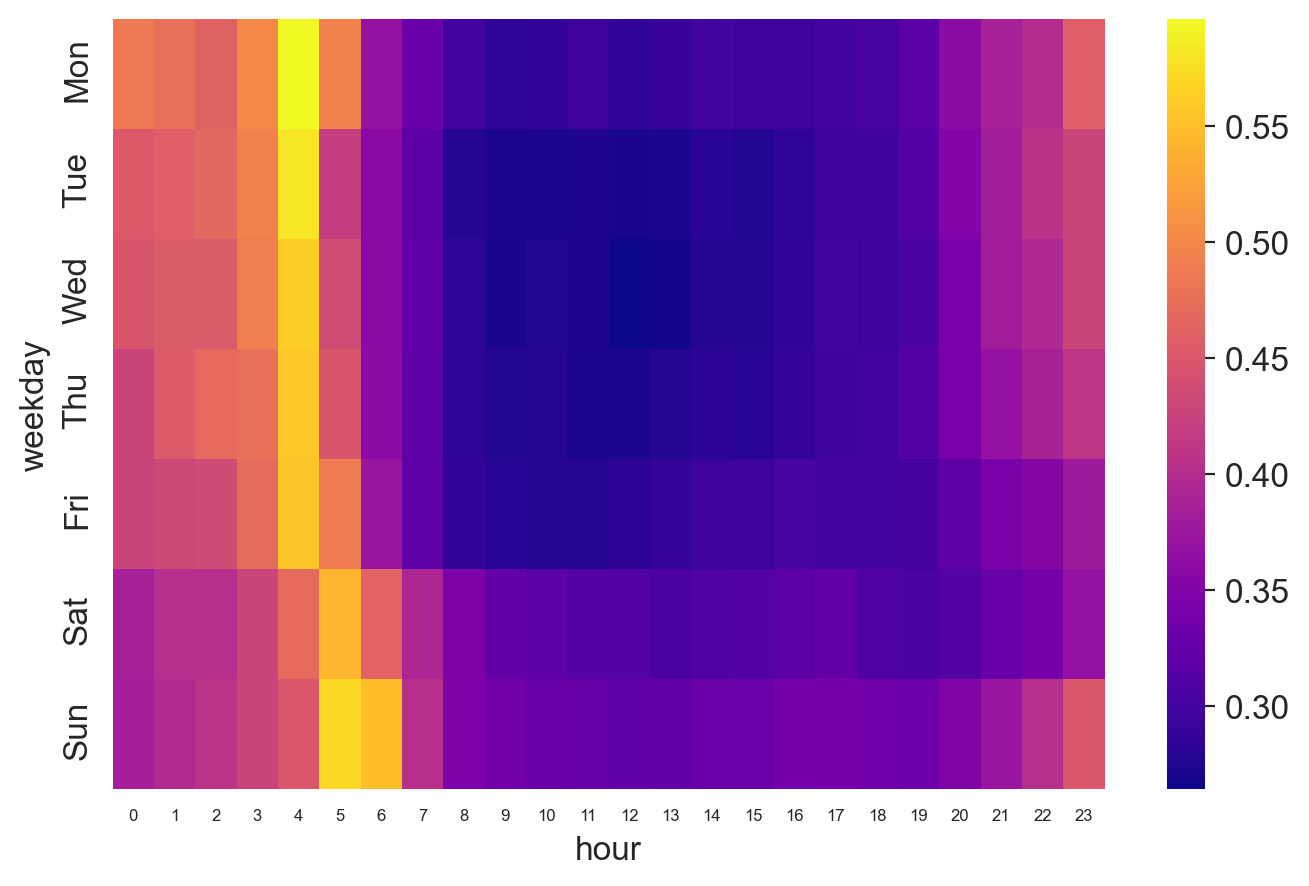

In [43]:
import matplotlib

days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.heatmap(pd.pivot_table(X_train, values='avg_speed', index='weekday', columns='hour', aggfunc=np.median),
                cmap='plasma')
plt.yticks(ticks=range(len(days_of_week)), labels=days_of_week)

dx = 0
dy = -0.5
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in g.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
plt.show()

In [44]:
X_train = X_train.drop('avg_speed', axis=1)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?
**Ответ**: Потому что она напрямую вычисляется на основе таргета (то есть мы не можем посчитать ее на новых данных, для которых строим прогноз)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.
**Ответ**: Скорость минимальна в будние дни в среднем с 9 до 15. В городе плотный трафик, дикие пробки. Скорость максимальна в 0-5 утра по будням и 4-6 утра по выходным. В будни люди крепко спят, а по выходным видимо любят погулять до 4-5 утра

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [45]:
def add_traffic_features(X):
    X['busy_traffic'] = X['weekday'].isin(range(5)) & X['hour'].isin(range(9, 16))
    X['light_traffic'] = X['weekday'].isin(range(5)) & X['hour'].isin(range(6)) | X['weekday'].isin(range(5, 7)) & X[
        'hour'].isin(range(4, 7))

In [46]:
add_traffic_features(X_train)
add_traffic_features(X_test)
X_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1183110  id2786385          1 2016-05-13 18:10:09                1   
1415769  id3037797          1 2016-03-20 02:03:36                2   
940140   id2349575          2 2016-01-07 22:09:04                1   
1263734  id3905543          1 2016-05-31 15:11:44                1   
145592   id1627565          1 2016-04-12 11:21:10                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1183110        -73.987053        40.725471         -73.999504   
1415769        -73.971756        40.761894         -73.982124   
940140         -73.986534        40.742668         -74.007301   
1263734        -73.982246        40.768192         -73.976479   
145592         -73.963974        40.775284         -73.960594   

         dropoff_latitude store_and_fwd_flag  weekday  month  hour  \
1183110         40.728611                  N        4      5    18   
1415769         40.755253                  N        6      3     2   
940140          40.741310                  N        3      1    22   
1263734         40.785740                  N        1      5    15   
145592          40.780769                  N        1      4    11   

         is_anomal_first  is_anomal_second  day_of_year  haversine  \
1183110            False             False          134   1.105768   
1415769            False             False           80   1.143679   
940140             False             False            7   1.756091   
1263734            False             False          152   2.010740   
145592             False             False          103   0.673087   

         haversine_log  busy_traffic  light_traffic  
1183110       0.744680         False          False  
1415769       0.762523         False          False  
940140        1.013813         False          False  
1263734       1.102186          True          False  
145592        0.514670          True          False

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

Найдем их координаты

In [47]:
def show_airports_on_map(data, latitude_column, longitude_column):
    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    loc = (40.625, -73.8135)
    folium.Rectangle(
        bounds=[loc, (loc[0] + 0.04, loc[1] + 0.055)], color='green'
    ).add_to(m)

    loc = (40.765, -73.89)
    folium.Rectangle(
        bounds=[loc, (loc[0] + 0.02, loc[1] + 0.035)], color='green'
    ).add_to(m)

    return m

In [48]:
show_airports_on_map(df.sample(50), "pickup_latitude", "pickup_longitude")

In [49]:
def add_airport_features(X):
    X['from_small_airport'] = (40.765 <= X['pickup_latitude']) & (X['pickup_latitude'] <= 40.765 + 0.02) & (
            -73.89 <= X['pickup_longitude']) & (X['pickup_longitude'] <= -73.89 + 0.035)
    X['to_small_airport'] = (40.765 <= X['dropoff_latitude']) & (X['dropoff_latitude'] <= 40.765 + 0.02) & (
            -73.89 <= X['dropoff_longitude']) & (X['dropoff_longitude'] <= -73.89 + 0.035)

    X['from_big_airport'] = (40.625 <= X['pickup_latitude']) & (X['pickup_latitude'] <= 40.625 + 0.04) & (
            -73.8135 <= X['pickup_longitude']) & (X['pickup_longitude'] <= -73.8135 + 0.055)
    X['to_big_airport'] = (40.625 <= X['dropoff_latitude']) & (X['dropoff_latitude'] <= 40.625 + 0.04) & (
            -73.8135 <= X['dropoff_longitude']) & (X['dropoff_longitude'] <= -73.8135 + 0.055)

In [50]:
add_airport_features(X_train)
add_airport_features(X_test)

print(len(X_train[X_train['from_big_airport']]))
print(len(X_train[X_train['to_big_airport']]))
print(len(X_train[X_train['from_small_airport']]))
print(len(X_train[X_train['to_small_airport']]))


22455
8933
25775
12767


Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

In [51]:
X_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'weekday', 'month', 'hour',
       'is_anomal_first', 'is_anomal_second', 'day_of_year', 'haversine',
       'haversine_log', 'busy_traffic', 'light_traffic', 'from_small_airport',
       'to_small_airport', 'from_big_airport', 'to_big_airport'],
      dtype='object')

In [52]:
X_train.loc[:, 'weekday':'to_big_airport']

weekday  month  hour  is_anomal_first  is_anomal_second  day_of_year  \
1183110        4      5    18            False             False          134   
1415769        6      3     2            False             False           80   
940140         3      1    22            False             False            7   
1263734        1      5    15            False             False          152   
145592         1      4    11            False             False          103   
...          ...    ...   ...              ...               ...          ...   
64388          6      6     2            False             False          157   
341459         2      6     9            False             False          167   
1429557        4      2    18            False             False           57   
159563         4      3     7            False             False           78   
32161          1      1    17            False             False           19   

         haversine  haversine_log  busy_traffic  light_traffic  \
1183110   1.105768       0.744680         False          False   
1415769   1.143679       0.762523         False          False   
940140    1.756091       1.013813         False          False   
1263734   2.010740       1.102186          True          False   
145592    0.673087       0.514670          True          False   
...            ...            ...           ...            ...   
64388     7.502377       2.140346         False          False   
341459    0.949040       0.667337          True          False   
1429557   0.702067       0.531844         False          False   
159563    9.683346       2.368686         False          False   
32161     1.529657       0.928084         False          False   

         from_small_airport  to_small_airport  from_big_airport  \
1183110               False             False             False   
1415769               False             False             False   
940140                False             False             False   
1263734               False             False             False   
145592                False             False             False   
...                     ...               ...               ...   
64388                 False             False             False   
341459                False             False             False   
1429557               False             False             False   
159563                False             False             False   
32161                 False             False             False   

         to_big_airport  
1183110           False  
1415769           False  
940140            False  
1263734           False  
145592            False  
...                 ...  
64388             False  
341459            False  
1429557           False  
159563            False  
32161             False  

[1021050 rows x 14 columns]

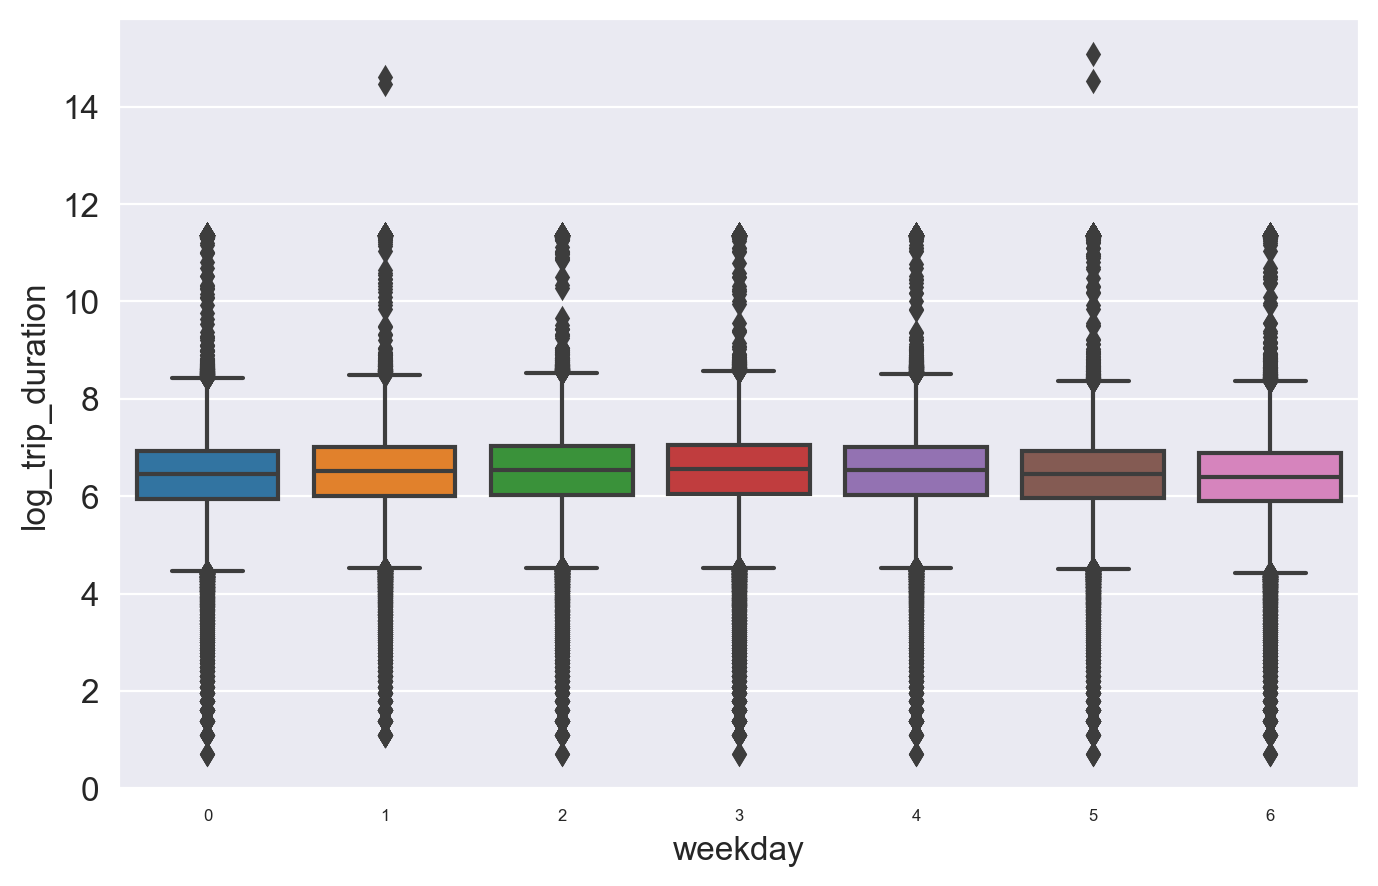

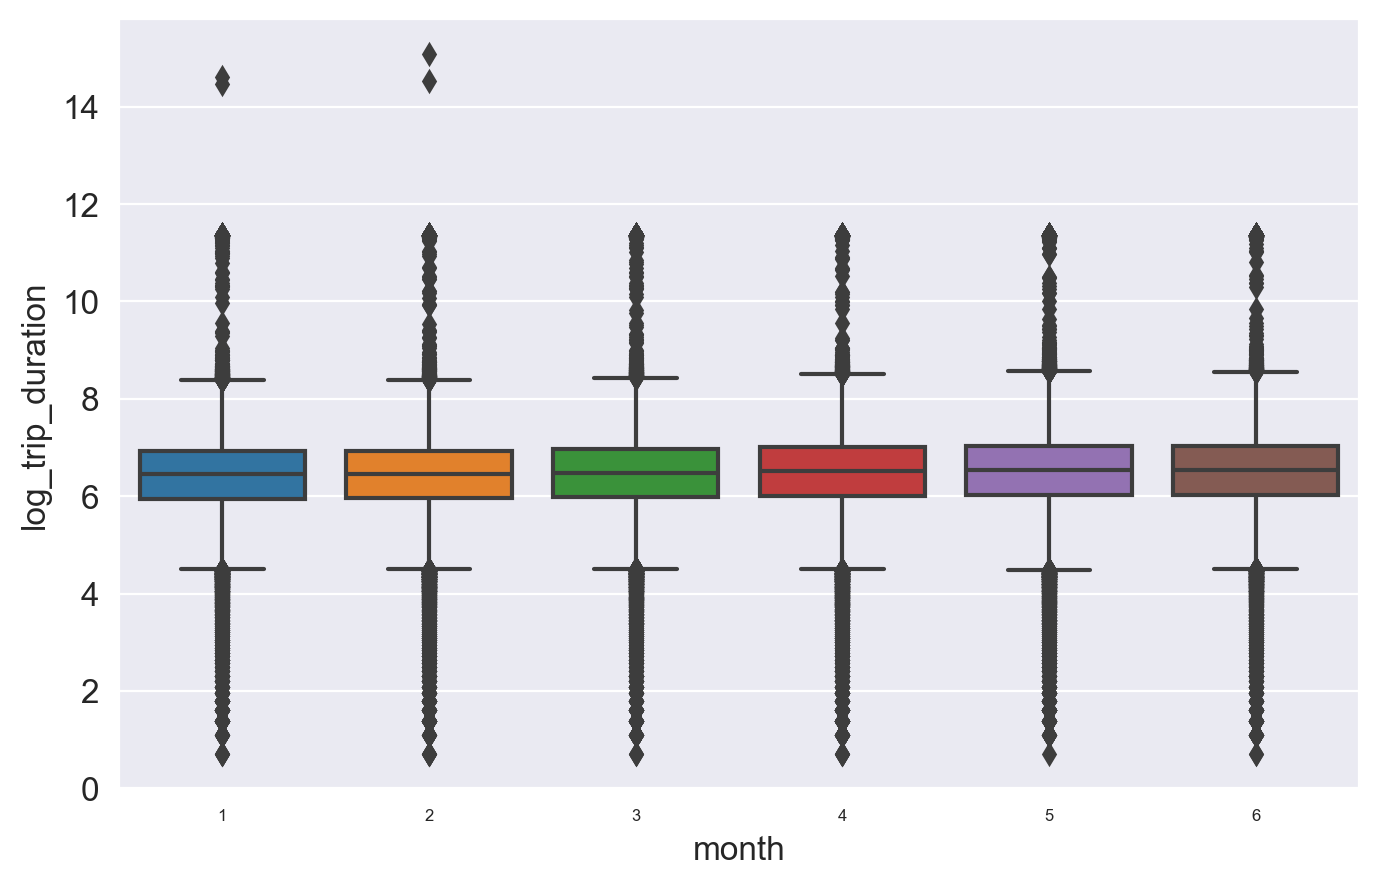

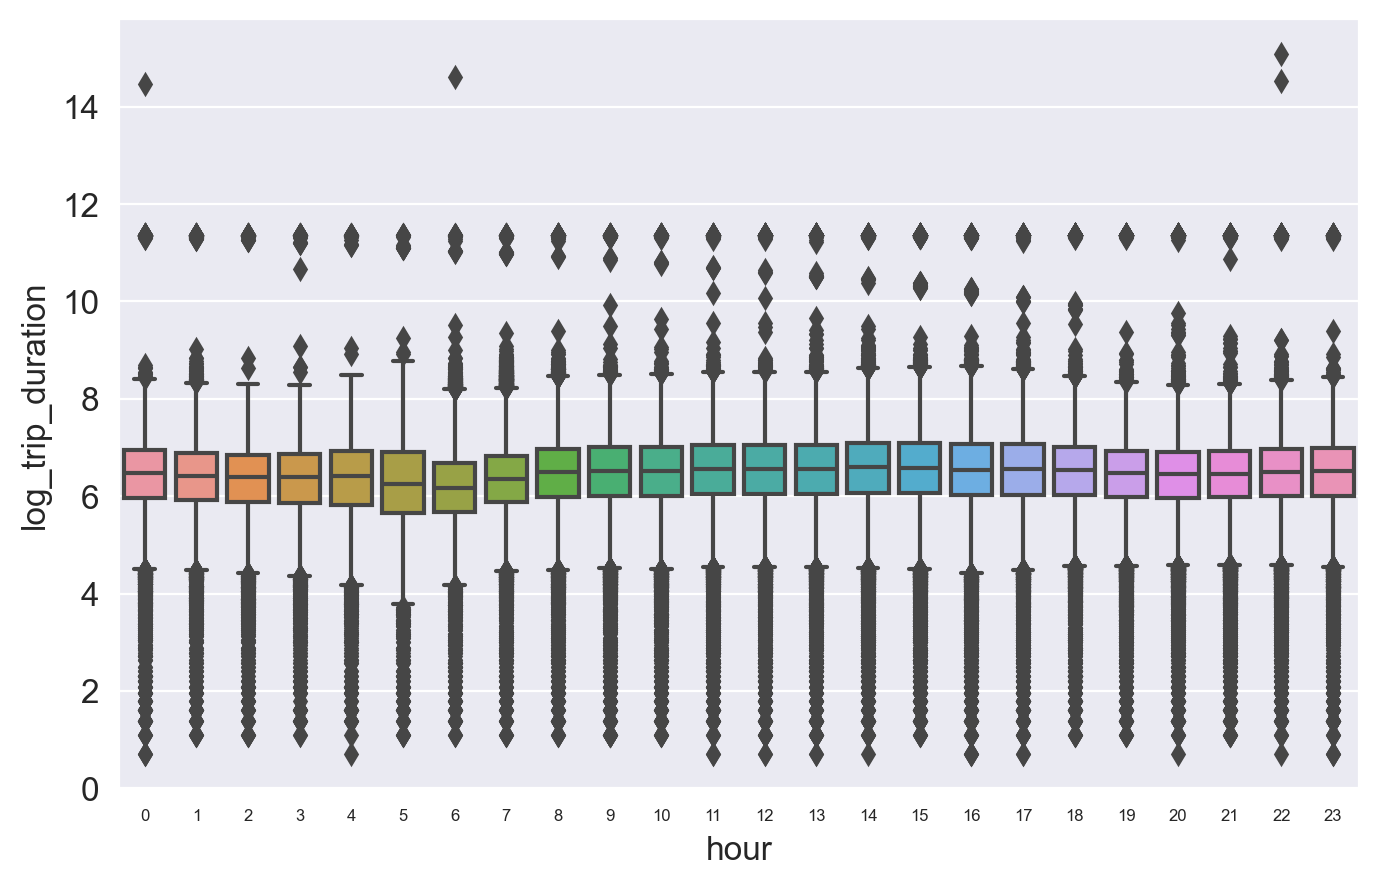

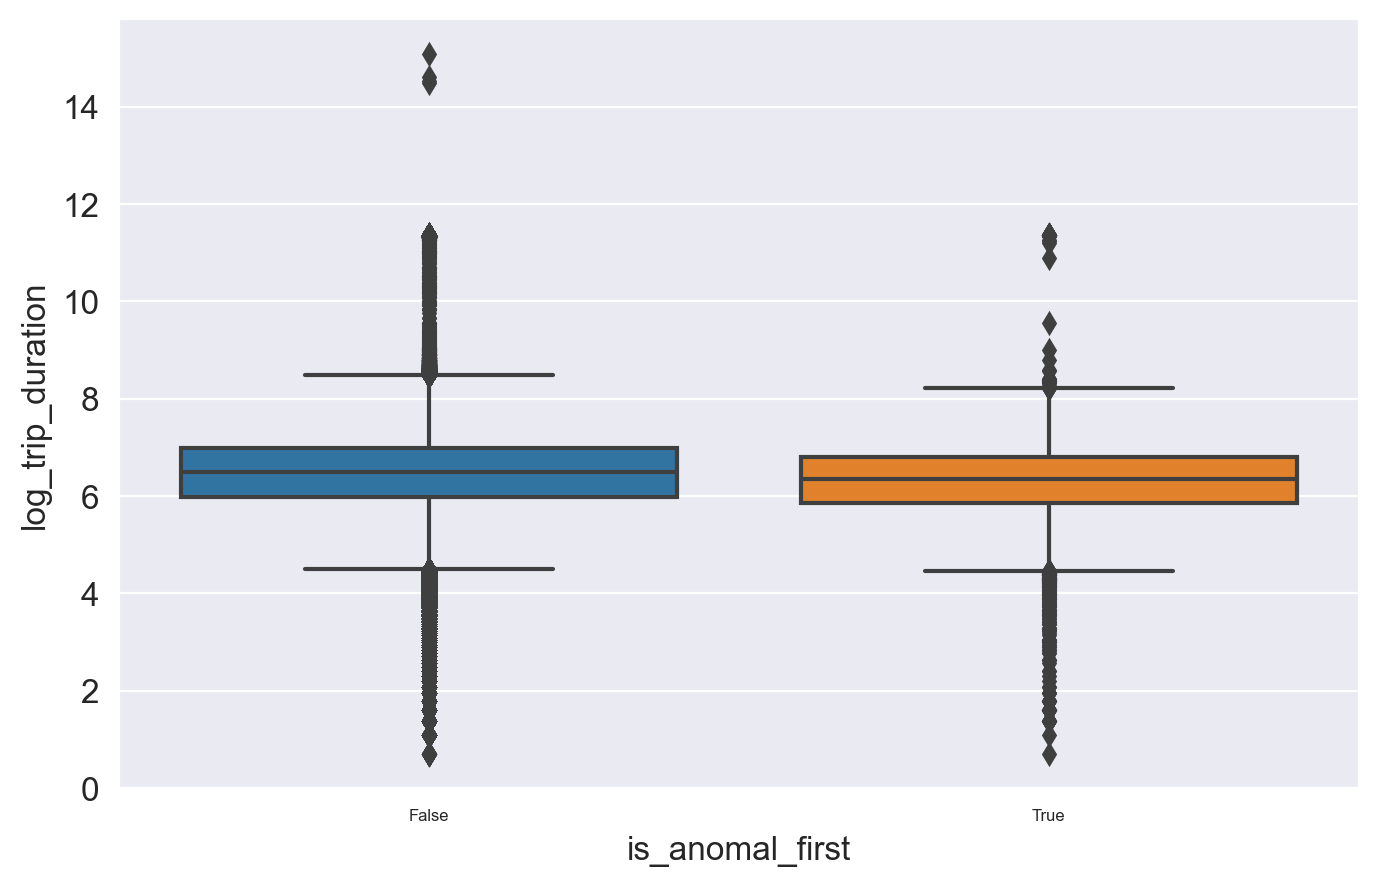

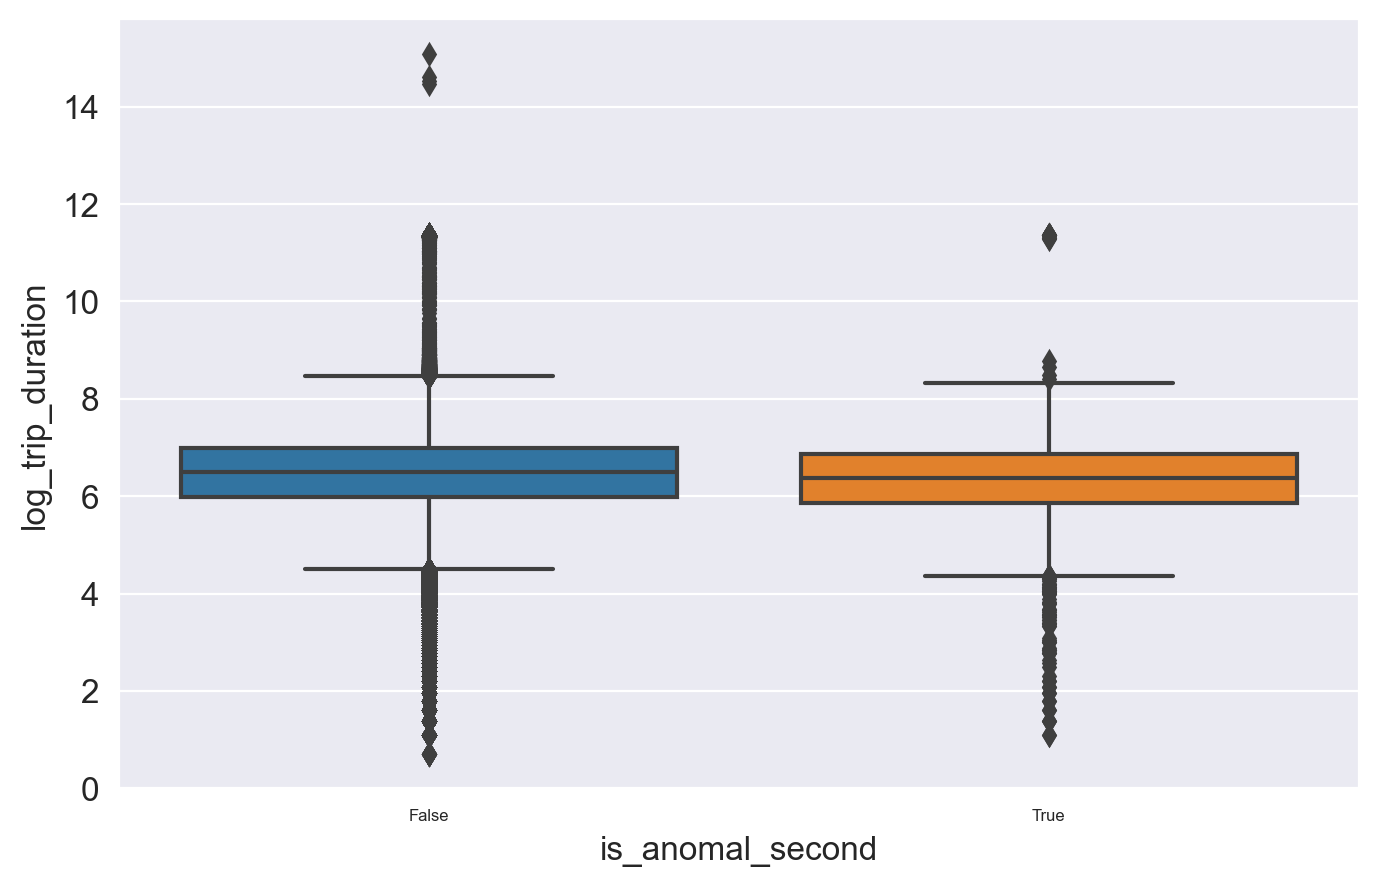

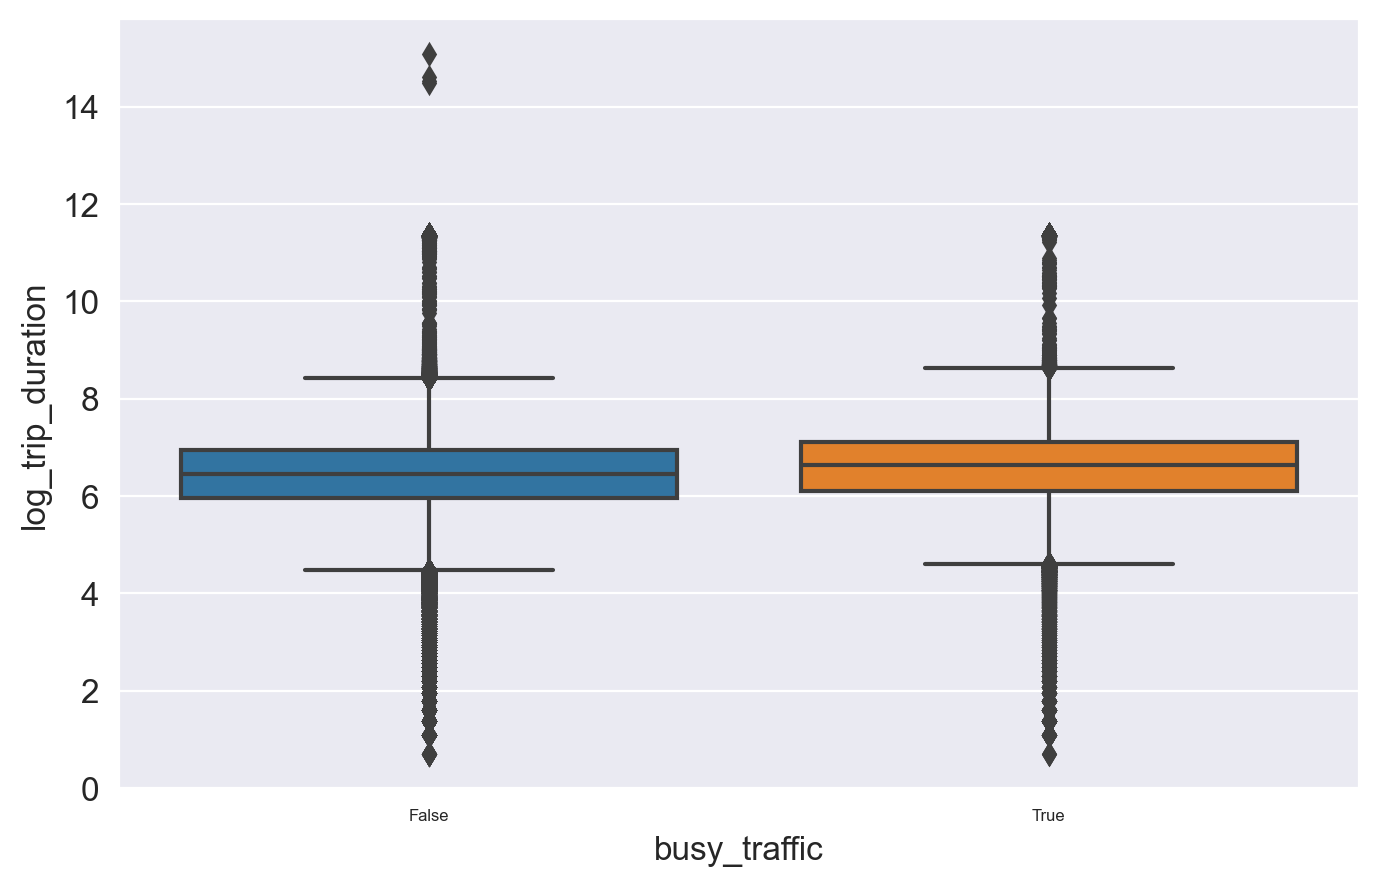

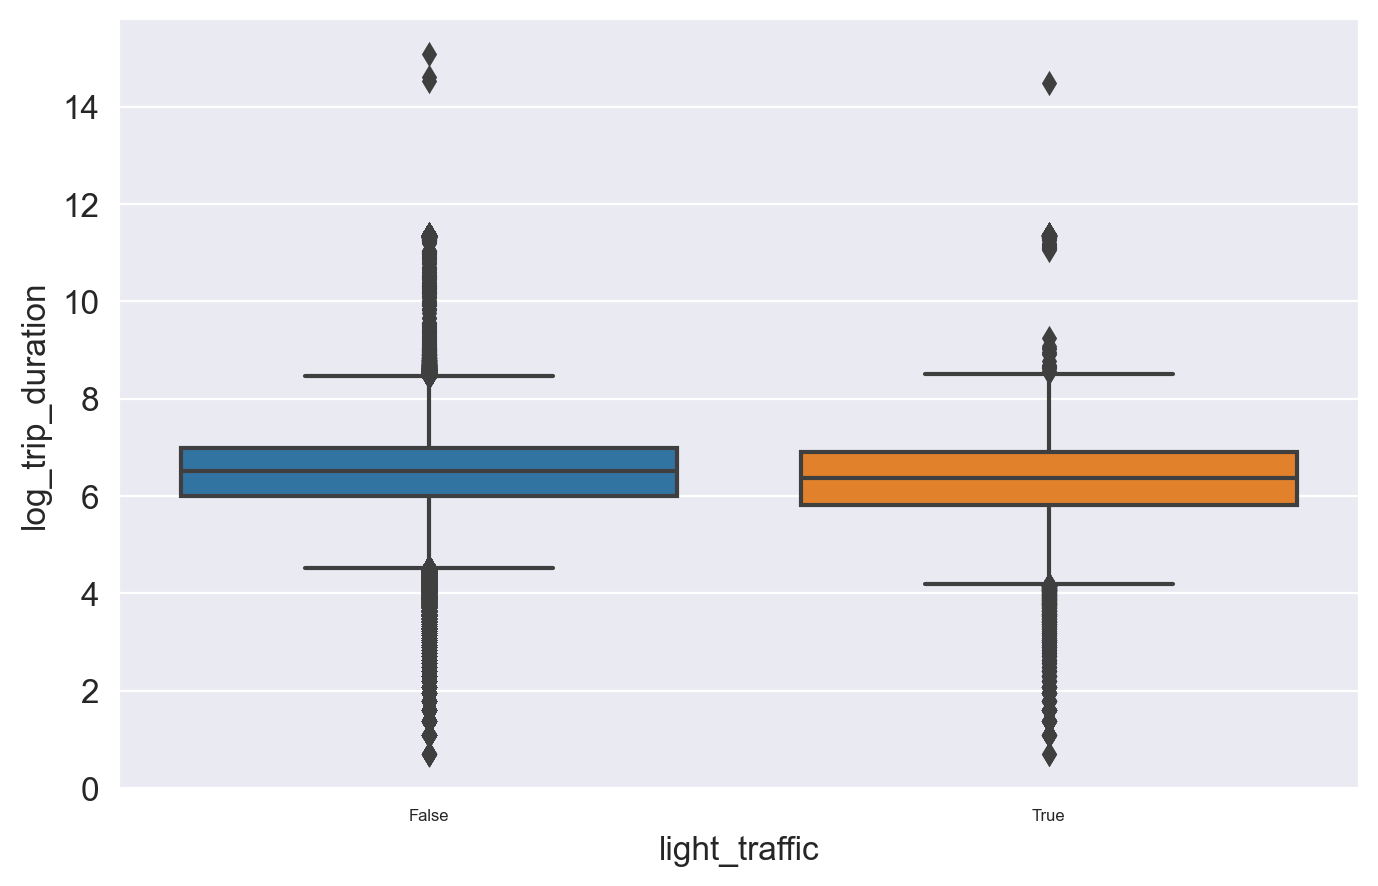

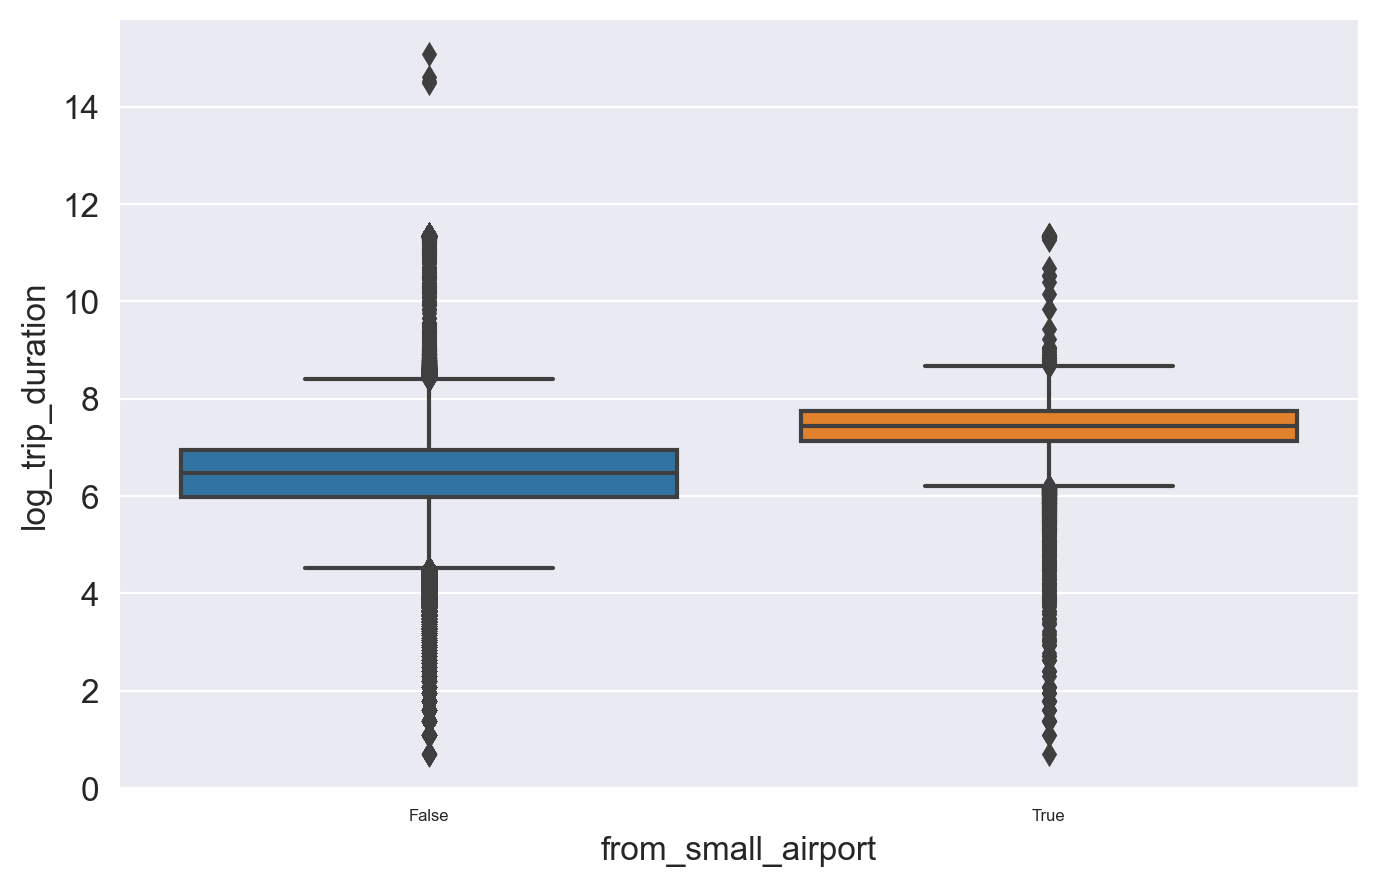

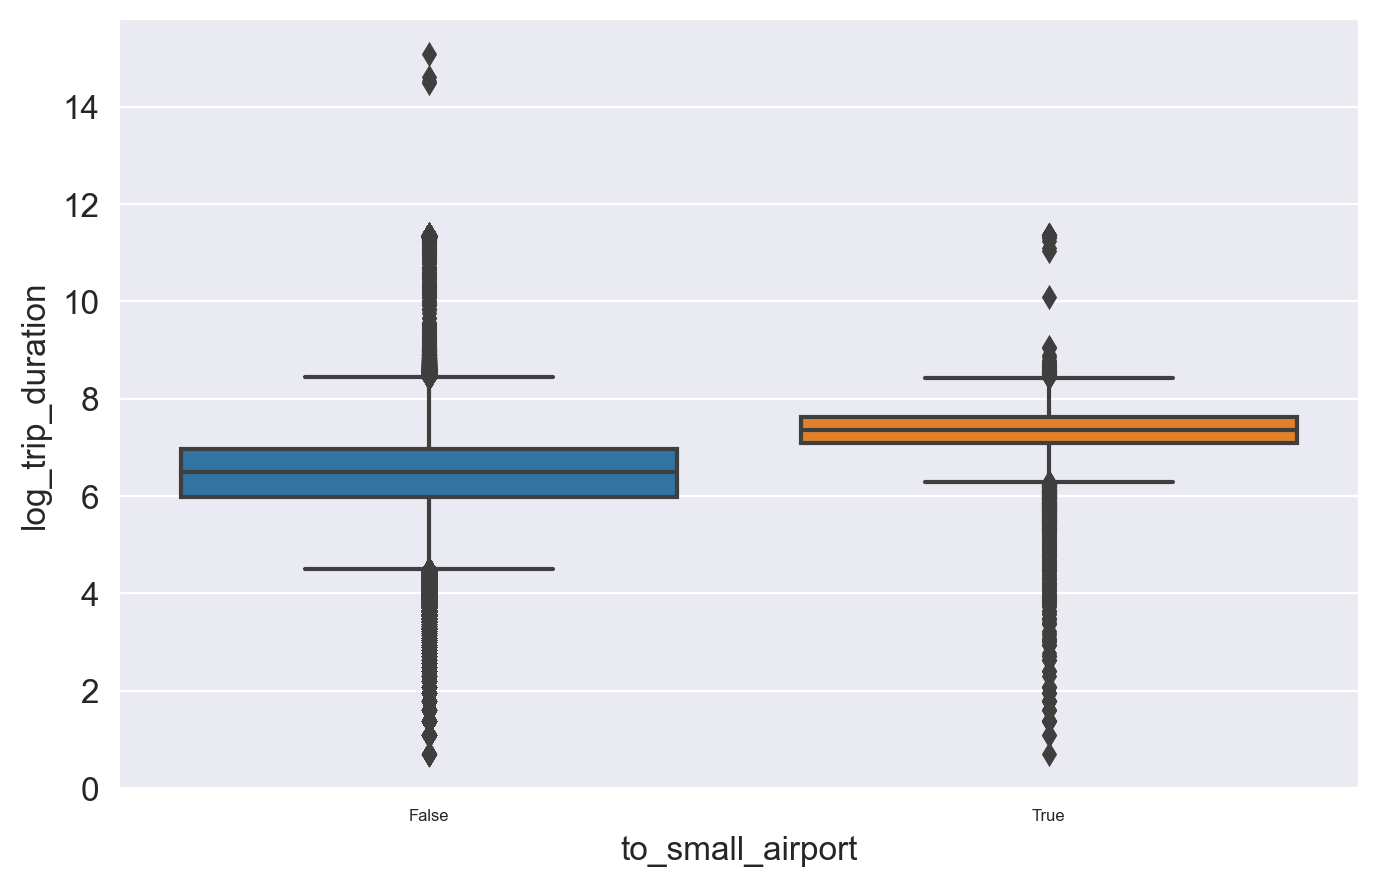

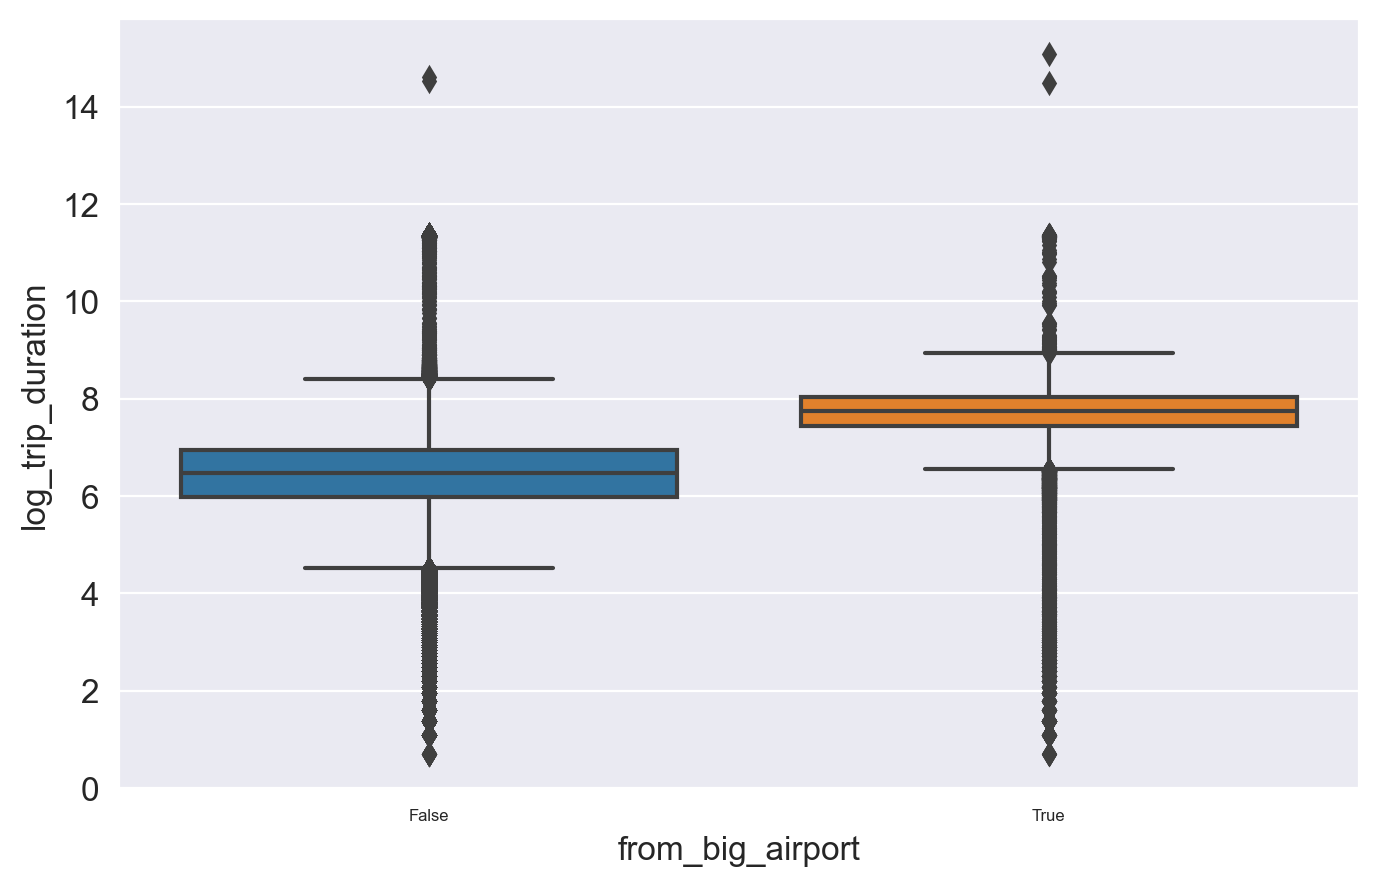

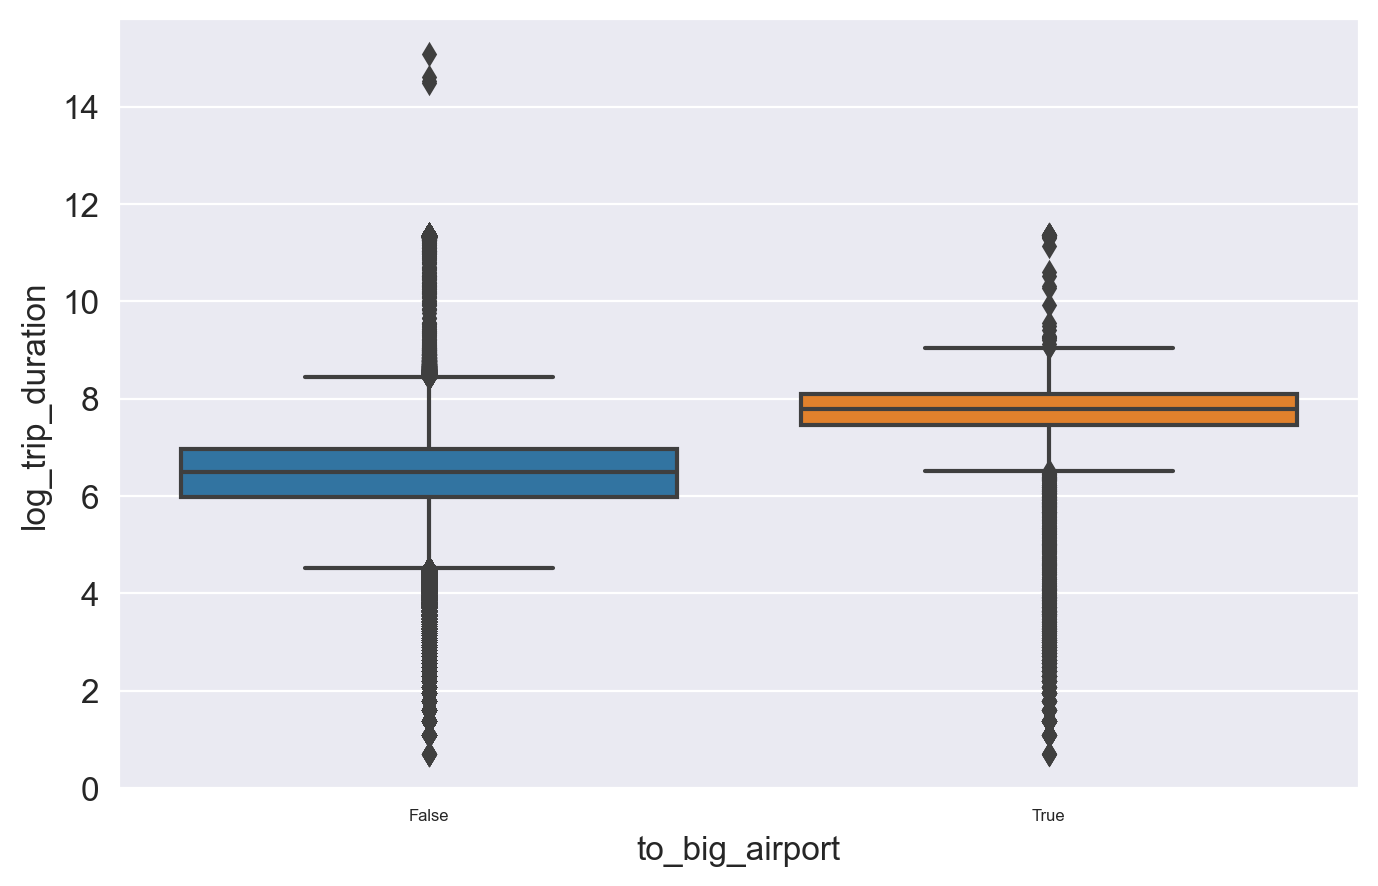

In [53]:
custom_features = list(X_train.columns[9:])
# Слишком много различных значений
custom_features.remove('day_of_year')
custom_features.remove('haversine')
custom_features.remove('haversine_log')

for feature in custom_features:
    sns.boxplot(x=X_train[feature], y=y_train)
    plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?
**Ответ**: Кажется, что month и weekday (что немного странно) не очень полезны, так как ящики с усами почти одинаковые. hour более полезен, так как заметно разнообразие. is_anomal хорошо отсекает выбросы сверху. Аэропортные признаки весьма хорошо, так как у них заметно отличаются квантили.


<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [54]:
X_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1183110  id2786385          1 2016-05-13 18:10:09                1   
1415769  id3037797          1 2016-03-20 02:03:36                2   
940140   id2349575          2 2016-01-07 22:09:04                1   
1263734  id3905543          1 2016-05-31 15:11:44                1   
145592   id1627565          1 2016-04-12 11:21:10                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1183110        -73.987053        40.725471         -73.999504   
1415769        -73.971756        40.761894         -73.982124   
940140         -73.986534        40.742668         -74.007301   
1263734        -73.982246        40.768192         -73.976479   
145592         -73.963974        40.775284         -73.960594   

         dropoff_latitude store_and_fwd_flag  weekday  ...  is_anomal_second  \
1183110         40.728611                  N        4  ...             False   
1415769         40.755253                  N        6  ...             False   
940140          40.741310                  N        3  ...             False   
1263734         40.785740                  N        1  ...             False   
145592          40.780769                  N        1  ...             False   

         day_of_year  haversine  haversine_log  busy_traffic  light_traffic  \
1183110          134   1.105768       0.744680         False          False   
1415769           80   1.143679       0.762523         False          False   
940140             7   1.756091       1.013813         False          False   
1263734          152   2.010740       1.102186          True          False   
145592           103   0.673087       0.514670          True          False   

         from_small_airport  to_small_airport  from_big_airport  \
1183110               False             False             False   
1415769               False             False             False   
940140                False             False             False   
1263734               False             False             False   
145592                False             False             False   

         to_big_airport  
1183110           False  
1415769           False  
940140            False  
1263734           False  
145592            False  

[5 rows x 23 columns]

In [55]:
from IPython.display import display
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pickup_latitude_column, pickup_longitude_column, dropoff_latitude_column,
                 dropoff_longitude_column, rows=8, columns=8):
        self.X = None
        self.rows = rows
        self.columns = columns
        self.pickup_latitude_column = pickup_latitude_column
        self.pickup_longitude_column = pickup_longitude_column
        self.dropoff_latitude_column = dropoff_latitude_column
        self.dropoff_longitude_column = dropoff_longitude_column
        self.horizontals = None
        self.verticals = None

    def show_map(self):
        if self.X is not None:
            location = (self.X[self.pickup_latitude_column].mean(), self.X[self.pickup_longitude_column].mean())
            m = folium.Map(location=location, zoom_start=11)

            folium.Rectangle(
                bounds=[(self.horizontals[0], self.verticals[0]), (self.horizontals[-1], self.verticals[-1])],
                color='red'
            ).add_to(m)

            for cord in self.horizontals:
                folium.PolyLine(locations=[(cord, self.verticals[0]), (cord, self.verticals[-1])], color='red').add_to(
                    m)
            for cord in self.verticals:
                folium.PolyLine(locations=[(self.horizontals[0], cord), (self.horizontals[-1], cord)],
                                color='red').add_to(m)

            for _, row in self.X.iterrows():
                folium.Circle(
                    radius=100,
                    location=(row[self.pickup_latitude_column], row[self.pickup_longitude_column]),
                    color='green',
                    fill_color='green',
                    fill=True
                ).add_to(m)

            for _, row in self.X.iterrows():
                folium.Circle(
                    radius=100,
                    location=(row[self.dropoff_latitude_column], row[self.dropoff_longitude_column]),
                    color='blue',
                    fill_color='blue',
                    fill=True
                ).add_to(m)

            display(m)

    def fit(self, X=None):
        self.X = X
        upper_q_lat = self.X[self.pickup_latitude_column].quantile(0.93)
        upper_q_lon = self.X[self.pickup_longitude_column].quantile(0.93)
        lower_q_lat = self.X[self.pickup_latitude_column].quantile(0.05)
        lower_q_lon = self.X[self.pickup_longitude_column].quantile(0.05)

        self.horizontals = np.linspace(lower_q_lat, upper_q_lat, self.rows + 1)
        self.verticals = np.linspace(lower_q_lon, upper_q_lon, self.columns + 1)

        return self

    def _get_labels(self, rel_lat, rel_lon):
        len_ver = (self.horizontals[-1] - self.horizontals[0]) / self.rows
        len_hor = (self.verticals[-1] - self.verticals[0]) / self.columns

        x = rel_lon // len_hor
        y = rel_lat // len_ver

        label = y * self.columns + x
        label[(y >= self.rows) | (y < 0)] = -1
        label[(x >= self.columns) | (x < 0)] = -1

        return label

    def transform(self, X):
        rel_lat = X[self.pickup_latitude_column] - self.horizontals[0]
        rel_lon = X[self.pickup_longitude_column] - self.verticals[0]
        labels_pickup = self._get_labels(rel_lat, rel_lon)

        rel_lat = X[self.dropoff_latitude_column] - self.horizontals[0]
        rel_lon = X[self.dropoff_longitude_column] - self.verticals[0]
        labels_dropoff = self._get_labels(rel_lat, rel_lon)

        return X.assign(pickup_point=labels_pickup, dropoff_point=labels_dropoff)

In [56]:
# Smoke test

mg_transformer = MapGridTransformer('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
rand_X = X_train.sample(10)
mg_transformer.fit(rand_X)
rand_X_transformed = mg_transformer.transform(rand_X)
mg_transformer.show_map()

In [57]:
rand_X

id  vendor_id     pickup_datetime  passenger_count  \
768598   id3433344          2 2016-06-21 11:09:58                1   
171420   id2927369          2 2016-01-21 10:37:17                1   
1268416  id0292061          1 2016-03-10 14:58:29                1   
274916   id3631496          1 2016-03-29 10:41:47                1   
1357844  id2891095          2 2016-04-09 22:44:27                5   
372554   id0676913          2 2016-05-21 00:22:18                5   
1062209  id2750693          1 2016-04-06 16:44:06                1   
1268323  id1761948          1 2016-01-27 19:10:41                1   
38417    id3465342          2 2016-01-22 19:21:11                1   
1291928  id3131017          1 2016-03-04 21:01:28                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
768598         -73.994148        40.732178         -73.997108   
171420         -73.975090        40.752388         -73.990517   
1268416        -73.874474        40.774067         -73.982071   
274916         -74.007370        40.707726         -74.005325   
1357844        -73.980270        40.761501         -73.981735   
372554         -73.992188        40.759209         -73.978333   
1062209        -73.955467        40.764034         -74.017944   
1268323        -73.984711        40.764023         -73.982155   
38417          -73.971825        40.763199         -73.979462   
1291928        -73.991425        40.749813         -73.983665   

         dropoff_latitude store_and_fwd_flag  weekday  ...  is_anomal_second  \
768598          40.747093                  N        1  ...             False   
171420          40.740253                  N        3  ...             False   
1268416         40.762070                  N        3  ...             False   
274916          40.718616                  N        1  ...             False   
1357844         40.761414                  N        5  ...             False   
372554          40.729038                  N        5  ...             False   
1062209         40.705925                  N        2  ...             False   
1268323         40.773102                  N        2  ...             False   
38417           40.744698                  N        4  ...             False   
1291928         40.758026                  N        4  ...             False   

         day_of_year  haversine  haversine_log  busy_traffic  light_traffic  \
768598           173   1.677171       0.984761          True          False   
171420            21   1.873365       1.055484          True          False   
1268416           70   9.158929       2.318353          True          False   
274916            89   1.223220       0.798957          True          False   
1357844          100   0.123758       0.116679         False          False   
372554           142   3.552050       1.515578         False          False   
1062209           97   8.334335       2.233700         False          False   
1268323           27   1.032226       0.709132         False          False   
38417             22   2.155478       1.149140         False          False   
1291928           64   1.123020       0.752839         False          False   

         from_small_airport  to_small_airport  from_big_airport  \
768598                False             False             False   
171420                False             False             False   
1268416                True             False             False   
274916                False             False             False   
1357844               False             False             False   
372554                False             False             False   
1062209               False             False             False   
1268323               False             False             False   
38417                 False             False             False   
1291928               False             False             False   

         to_big_airport  
768598        

In [58]:
rand_X_transformed

id  vendor_id     pickup_datetime  passenger_count  \
768598   id3433344          2 2016-06-21 11:09:58                1   
171420   id2927369          2 2016-01-21 10:37:17                1   
1268416  id0292061          1 2016-03-10 14:58:29                1   
274916   id3631496          1 2016-03-29 10:41:47                1   
1357844  id2891095          2 2016-04-09 22:44:27                5   
372554   id0676913          2 2016-05-21 00:22:18                5   
1062209  id2750693          1 2016-04-06 16:44:06                1   
1268323  id1761948          1 2016-01-27 19:10:41                1   
38417    id3465342          2 2016-01-22 19:21:11                1   
1291928  id3131017          1 2016-03-04 21:01:28                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
768598         -73.994148        40.732178         -73.997108   
171420         -73.975090        40.752388         -73.990517   
1268416        -73.874474        40.774067         -73.982071   
274916         -74.007370        40.707726         -74.005325   
1357844        -73.980270        40.761501         -73.981735   
372554         -73.992188        40.759209         -73.978333   
1062209        -73.955467        40.764034         -74.017944   
1268323        -73.984711        40.764023         -73.982155   
38417          -73.971825        40.763199         -73.979462   
1291928        -73.991425        40.749813         -73.983665   

         dropoff_latitude store_and_fwd_flag  weekday  ...  haversine  \
768598          40.747093                  N        1  ...   1.677171   
171420          40.740253                  N        3  ...   1.873365   
1268416         40.762070                  N        3  ...   9.158929   
274916          40.718616                  N        1  ...   1.223220   
1357844         40.761414                  N        5  ...   0.123758   
372554          40.729038                  N        5  ...   3.552050   
1062209         40.705925                  N        2  ...   8.334335   
1268323         40.773102                  N        2  ...   1.032226   
38417           40.744698                  N        4  ...   2.155478   
1291928         40.758026                  N        4  ...   1.123020   

         haversine_log  busy_traffic  light_traffic  from_small_airport  \
768598        0.984761          True          False               False   
171420        1.055484          True          False               False   
1268416       2.318353          True          False                True   
274916        0.798957          True          False               False   
1357844       0.116679         False          False               False   
372554        1.515578         False          False               False   
1062209       2.233700         False          False               False   
1268323       0.709132         False          False               False   
38417         1.149140         False          False               False   
1291928       0.752839         False          False               False   

         to_small_airport  from_big_airport  to_big_airport  pickup_point  \
768598              False             False           False          16.0   
171420              False             False           False          42.0   
1268416             False             False           False          -1.0   
274916              False             False           False          -1.0   
1357844             False             False           False          50.0   
372554              False             False           False          48.0   
1062209             False             False           False          60.0   
1268323             False             False           False          57.0   
38417               False             False           False          59.0   
1291928             False             False           False          41.0   

         dropoff_point  
768598            32.0  
1

In [59]:
mg_transformer = MapGridTransformer('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

X_train = mg_transformer.fit(X_train).transform(X_train)
X_test = mg_transformer.transform(X_test)

X_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1183110  id2786385          1 2016-05-13 18:10:09                1   
1415769  id3037797          1 2016-03-20 02:03:36                2   
940140   id2349575          2 2016-01-07 22:09:04                1   
1263734  id3905543          1 2016-05-31 15:11:44                1   
145592   id1627565          1 2016-04-12 11:21:10                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1183110        -73.987053        40.725471         -73.999504   
1415769        -73.971756        40.761894         -73.982124   
940140         -73.986534        40.742668         -74.007301   
1263734        -73.982246        40.768192         -73.976479   
145592         -73.963974        40.775284         -73.960594   

         dropoff_latitude store_and_fwd_flag  weekday  ...  haversine  \
1183110         40.728611                  N        4  ...   1.105768   
1415769         40.755253                  N        6  ...   1.143679   
940140          40.741310                  N        3  ...   1.756091   
1263734         40.785740                  N        1  ...   2.010740   
145592          40.780769                  N        1  ...   0.673087   

         haversine_log  busy_traffic  light_traffic  from_small_airport  \
1183110       0.744680         False          False               False   
1415769       0.762523         False          False               False   
940140        1.013813         False          False               False   
1263734       1.102186          True          False               False   
145592        0.514670          True          False               False   

         to_small_airport  from_big_airport  to_big_airport  pickup_point  \
1183110             False             False           False          10.0   
1415769             False             False           False          44.0   
940140              False             False           False          26.0   
1263734             False             False           False          51.0   
145592              False             False           False          61.0   

         dropoff_point  
1183110           16.0  
1415769           35.0  
940140            -1.0  
1263734           -1.0  
145592            61.0  

[5 rows x 25 columns]

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [60]:
numeric_features = ['haversine', 'haversine_log']
categorical_features = ['weekday', 'month', 'hour', 'is_anomal_first', 'is_anomal_second', 'day_of_year',
                        'busy_traffic', 'light_traffic', 'from_small_airport', 'to_small_airport', 'from_big_airport',
                        'to_big_airport', 'pickup_point', 'dropoff_point']
ridge = make_first_pipeline(numeric_features, categorical_features)

In [61]:
ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['haversine',
                                                   'haversine_log']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['weekday', 'month', 'hour',
                                                   'is_anomal_first',
                                                   'is_anomal_second',
                                                   'day_of_year',
                                                   'busy_traffic',
                                                   'light_traffic',
                                                   'from_small_airport',
                                                   'to_small_airport',
                                                   'from_big_airport',
                                                   'to_big_airport',
                                                   'pickup_point',
                                                   'dropoff_point'])])),
                ('regression', Ridge())])

In [62]:
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Second Ridge MSE:', mse)

Second Ridge MSE: 0.2146328927078258


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.
**Ответ**: vendor_id - айди поставщика услуг, полезен, так как возжможно есть конторы, которые чаще осуществляют дальние (длительные поездки), хотя это корреллирует с haversine. Но может быть в некоторых конторах водители лихачат как не в себя и довозят быстрее тех, кто неторопливо везет богатеньких клиентов
passenger_count - число пассажиров, полезно, так как есть шанс, что большое число пассажиров может попросить такси развезти их в разные места и поездка будет дольше
store_and_fwd_flag - странная штука: Этот флаг указывает, сохранялась ли запись о поездке в памяти транспортного средства перед отправкой. Польза может быть в том, что если не было подключения к сети, то данные могут чутка грешить (как вариант, водитель может быть умеет обманывать систему и делать поездку короткой, но на самом деле везти пассажира за другую сумму и таким образом меньше заплатить сервису ака конторе)

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [63]:
X_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1183110  id2786385          1 2016-05-13 18:10:09                1   
1415769  id3037797          1 2016-03-20 02:03:36                2   
940140   id2349575          2 2016-01-07 22:09:04                1   
1263734  id3905543          1 2016-05-31 15:11:44                1   
145592   id1627565          1 2016-04-12 11:21:10                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1183110        -73.987053        40.725471         -73.999504   
1415769        -73.971756        40.761894         -73.982124   
940140         -73.986534        40.742668         -74.007301   
1263734        -73.982246        40.768192         -73.976479   
145592         -73.963974        40.775284         -73.960594   

         dropoff_latitude store_and_fwd_flag  weekday  ...  haversine  \
1183110         40.728611                  N        4  ...   1.105768   
1415769         40.755253                  N        6  ...   1.143679   
940140          40.741310                  N        3  ...   1.756091   
1263734         40.785740                  N        1  ...   2.010740   
145592          40.780769                  N        1  ...   0.673087   

         haversine_log  busy_traffic  light_traffic  from_small_airport  \
1183110       0.744680         False          False               False   
1415769       0.762523         False          False               False   
940140        1.013813         False          False               False   
1263734       1.102186          True          False               False   
145592        0.514670          True          False               False   

         to_small_airport  from_big_airport  to_big_airport  pickup_point  \
1183110             False             False           False          10.0   
1415769             False             False           False          44.0   
940140              False             False           False          26.0   
1263734             False             False           False          51.0   
145592              False             False           False          61.0   

         dropoff_point  
1183110           16.0  
1415769           35.0  
940140            -1.0  
1263734           -1.0  
145592            61.0  

[5 rows x 25 columns]

In [64]:
new_features = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']

for feature in new_features:
    # Специально смотрим по всей выборке
    print(f'Unique {feature}:', df[feature].unique().shape[0])

Unique vendor_id: 2
Unique passenger_count: 10
Unique store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

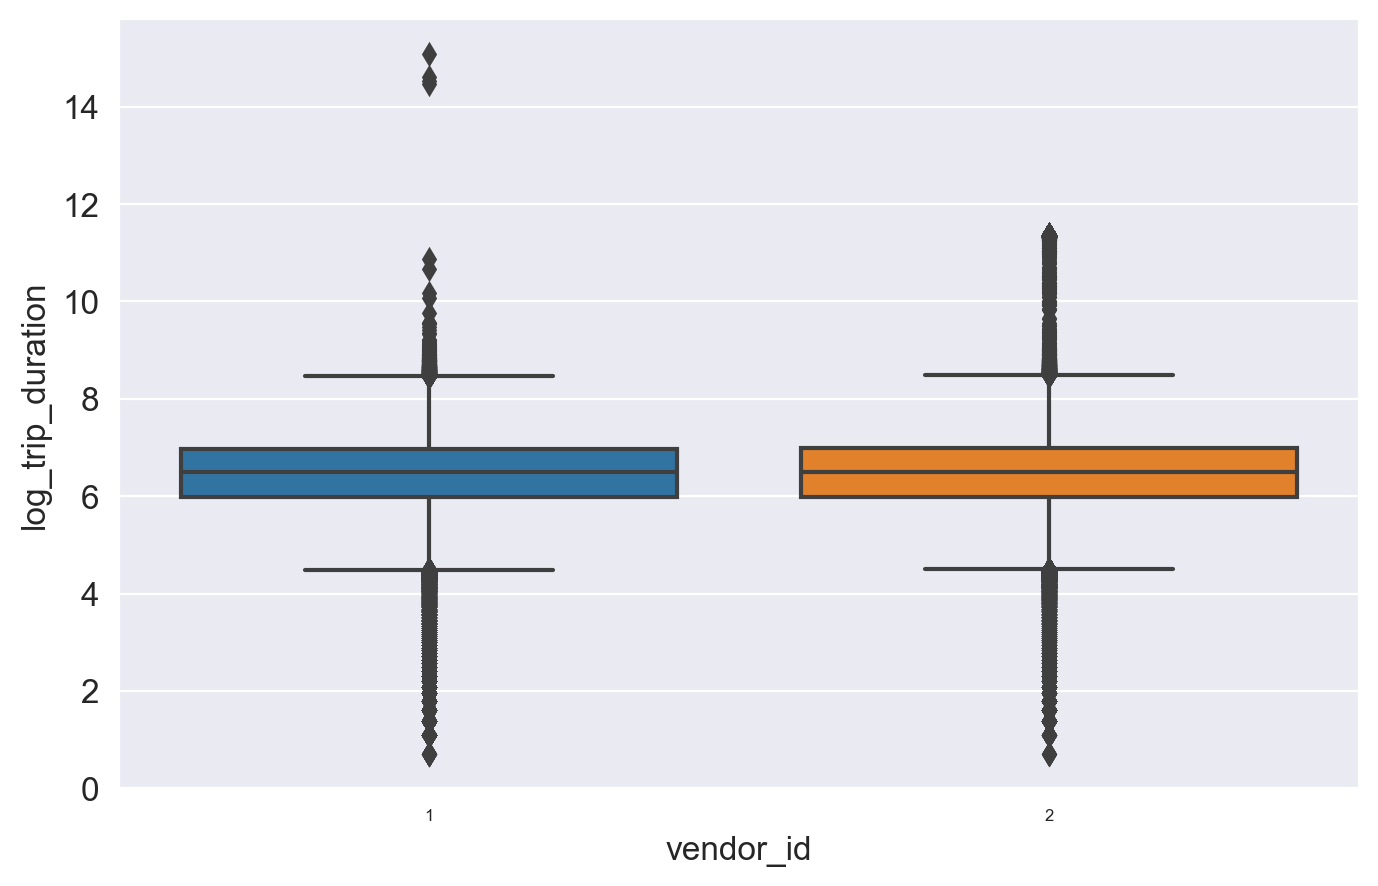

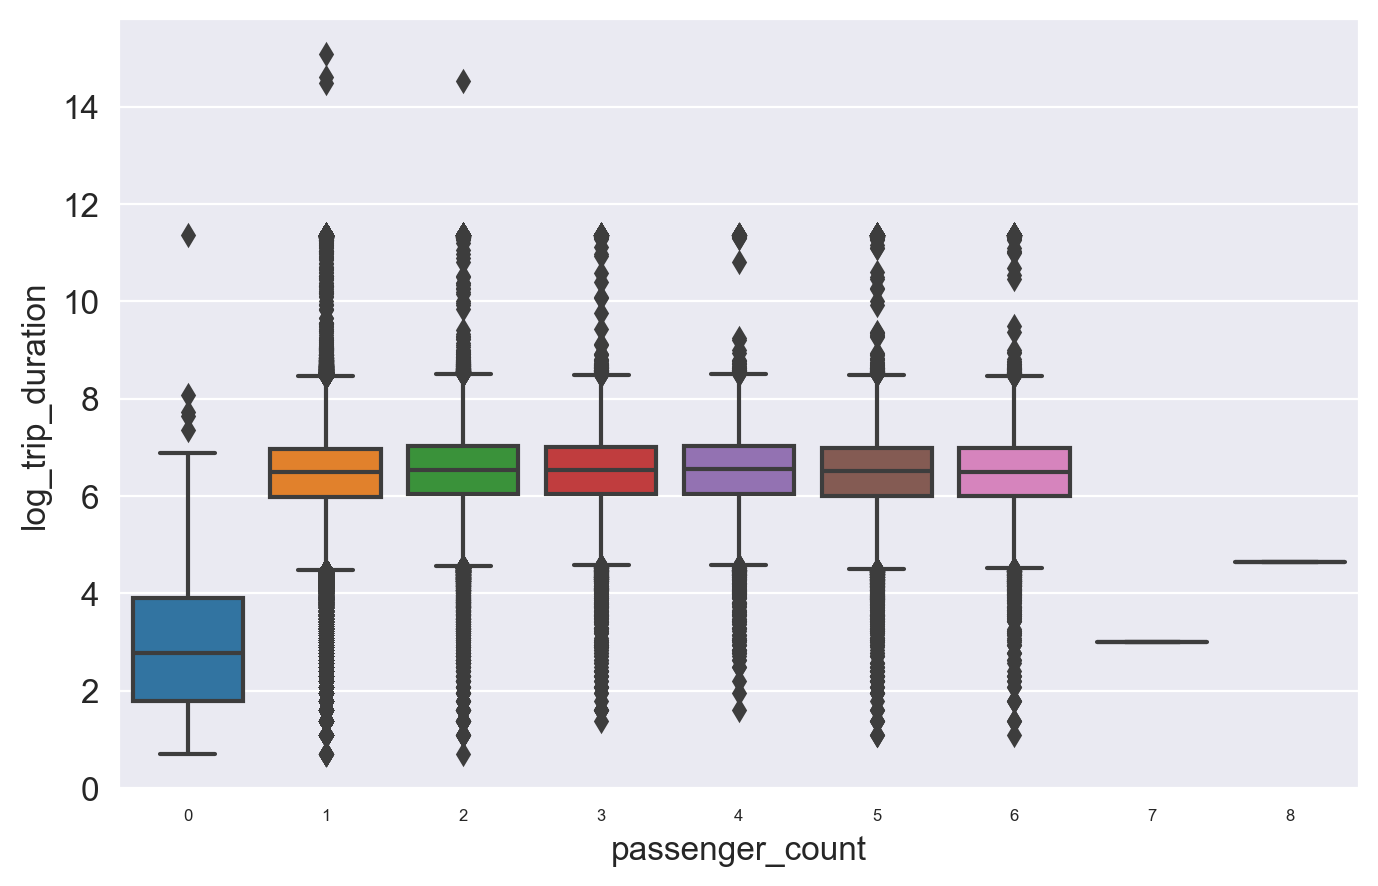

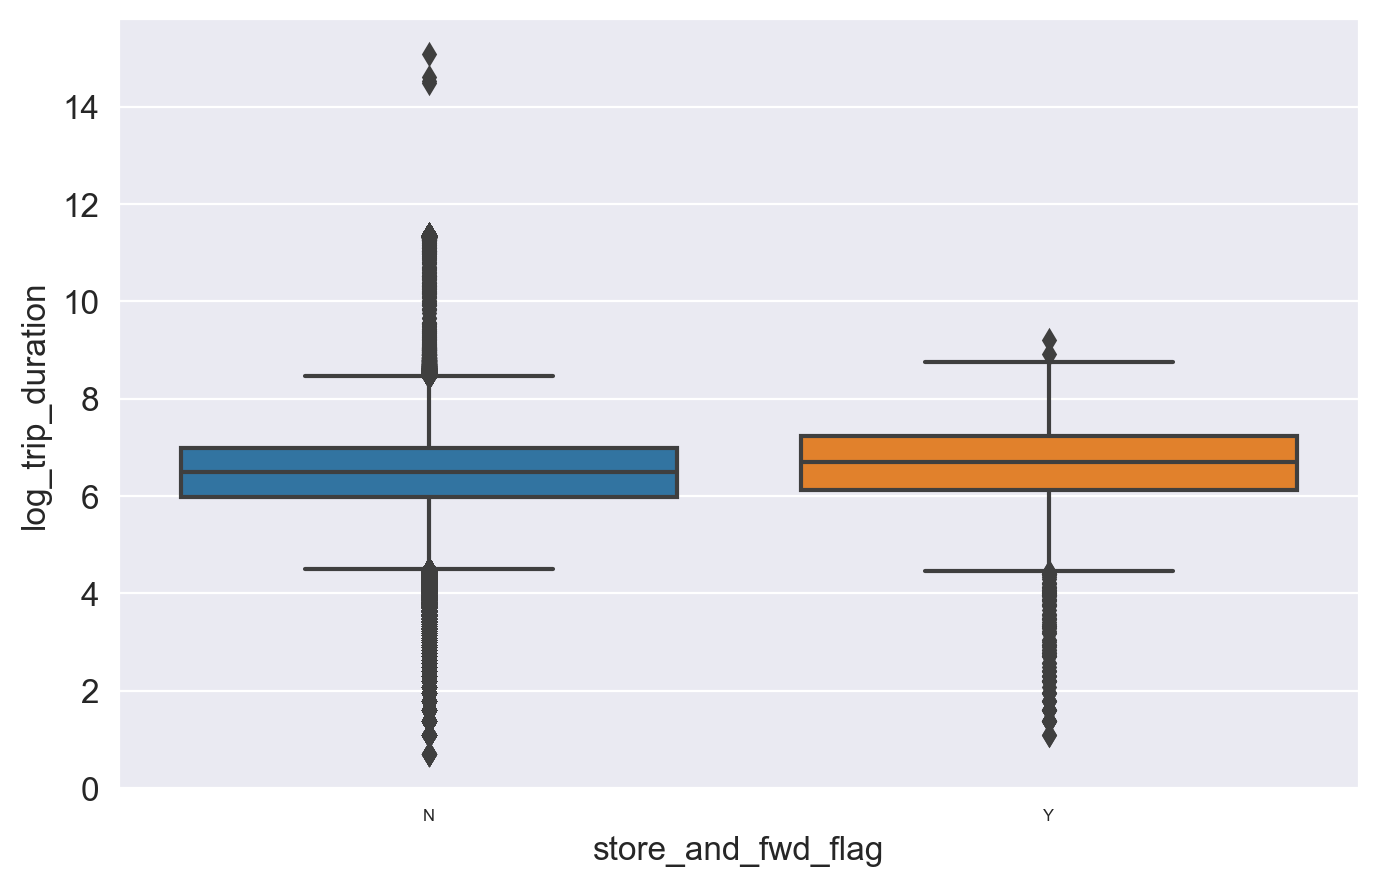

In [65]:
for feature in new_features:
    # Только по трейну, так как задействуем таргет
    sns.boxplot(x=X_train[feature], y=y_train)
    plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [66]:
def binarize_features(X):
    X.loc[X['vendor_id'] == 2, 'vendor_id'] = 1
    X.loc[X['vendor_id'] == 1, 'vendor_id'] = 0

    X.loc[X['store_and_fwd_flag'] == 'Y', 'store_and_fwd_flag'] = 1
    X.loc[X['store_and_fwd_flag'] == 'N', 'store_and_fwd_flag'] = 0


binarize_features(X_train)
binarize_features(X_test)

X_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1183110  id2786385          0 2016-05-13 18:10:09                1   
1415769  id3037797          0 2016-03-20 02:03:36                2   
940140   id2349575          0 2016-01-07 22:09:04                1   
1263734  id3905543          0 2016-05-31 15:11:44                1   
145592   id1627565          0 2016-04-12 11:21:10                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1183110        -73.987053        40.725471         -73.999504   
1415769        -73.971756        40.761894         -73.982124   
940140         -73.986534        40.742668         -74.007301   
1263734        -73.982246        40.768192         -73.976479   
145592         -73.963974        40.775284         -73.960594   

         dropoff_latitude store_and_fwd_flag  weekday  ...  haversine  \
1183110         40.728611                  0        4  ...   1.105768   
1415769         40.755253                  0        6  ...   1.143679   
940140          40.741310                  0        3  ...   1.756091   
1263734         40.785740                  0        1  ...   2.010740   
145592          40.780769                  0        1  ...   0.673087   

         haversine_log  busy_traffic  light_traffic  from_small_airport  \
1183110       0.744680         False          False               False   
1415769       0.762523         False          False               False   
940140        1.013813         False          False               False   
1263734       1.102186          True          False               False   
145592        0.514670          True          False               False   

         to_small_airport  from_big_airport  to_big_airport  pickup_point  \
1183110             False             False           False          10.0   
1415769             False             False           False          44.0   
940140              False             False           False          26.0   
1263734             False             False           False          51.0   
145592              False             False           False          61.0   

         dropoff_point  
1183110           16.0  
1415769           35.0  
940140            -1.0  
1263734           -1.0  
145592            61.0  

[5 rows x 25 columns]

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?
**Ответ**: Скорее всего сильным будет store_and_fwd_flag, так как его квантили для разных значений слегка отличаются
passenger_count будет полезен для поездок с 0 и 7+ пассажирами, так как остальные ящики почти одинаковы
vendor_id хоть и имеют одинаковые квантили, могут быть полезны так как у нуля сильнее выбросы


**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [67]:
numeric_features = ['haversine', 'haversine_log', 'passenger_count', 'vendor_id', 'store_and_fwd_flag']
categorical_features = ['weekday', 'month', 'hour', 'is_anomal_first', 'is_anomal_second', 'day_of_year',
                        'busy_traffic', 'light_traffic', 'from_small_airport', 'to_small_airport', 'from_big_airport',
                        'to_big_airport', 'pickup_point', 'dropoff_point']
ridge = make_first_pipeline(numeric_features, categorical_features)

In [68]:
ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['haversine', 'haversine_log',
                                                   'passenger_count',
                                                   'vendor_id',
                                                   'store_and_fwd_flag']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['weekday', 'month', 'hour',
                                                   'is_anomal_first',
                                                   'is_anomal_second',
                                                   'day_of_year',
                                                   'busy_traffic',
                                                   'light_traffic',
                                                   'from_small_airport',
                                                   'to_small_airport',
                                                   'from_big_airport',
                                                   'to_big_airport',
                                                   'pickup_point',
                                                   'dropoff_point'])])),
                ('regression', Ridge())])

In [69]:
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Second Ridge MSE:', mse)

Second Ridge MSE: 0.21458509349809038


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Эффекта почти нет, причем пробовал и как численные признаки, и как категориальные + ohe

In [70]:
X_train = X_train.drop(['passenger_count', 'vendor_id', 'store_and_fwd_flag'], axis=1)
X_test = X_test.drop(['passenger_count', 'vendor_id', 'store_and_fwd_flag'], axis=1)

X_train.head()

id     pickup_datetime  pickup_longitude  pickup_latitude  \
1183110  id2786385 2016-05-13 18:10:09        -73.987053        40.725471   
1415769  id3037797 2016-03-20 02:03:36        -73.971756        40.761894   
940140   id2349575 2016-01-07 22:09:04        -73.986534        40.742668   
1263734  id3905543 2016-05-31 15:11:44        -73.982246        40.768192   
145592   id1627565 2016-04-12 11:21:10        -73.963974        40.775284   

         dropoff_longitude  dropoff_latitude  weekday  month  hour  \
1183110         -73.999504         40.728611        4      5    18   
1415769         -73.982124         40.755253        6      3     2   
940140          -74.007301         40.741310        3      1    22   
1263734         -73.976479         40.785740        1      5    15   
145592          -73.960594         40.780769        1      4    11   

         is_anomal_first  ...  haversine  haversine_log  busy_traffic  \
1183110            False  ...   1.105768       0.744680         False   
1415769            False  ...   1.143679       0.762523         False   
940140             False  ...   1.756091       1.013813         False   
1263734            False  ...   2.010740       1.102186          True   
145592             False  ...   0.673087       0.514670          True   

         light_traffic  from_small_airport  to_small_airport  \
1183110          False               False             False   
1415769          False               False             False   
940140           False               False             False   
1263734          False               False             False   
145592           False               False             False   

         from_big_airport  to_big_airport  pickup_point  dropoff_point  
1183110             False           False          10.0           16.0  
1415769             False           False          44.0           35.0  
940140              False           False          26.0           -1.0  
1263734             False           False          51.0           -1.0  
145592              False           False          61.0           61.0  

[5 rows x 22 columns]

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

Будем отсекать не по квантилю, а по разумности (в моем понимании)

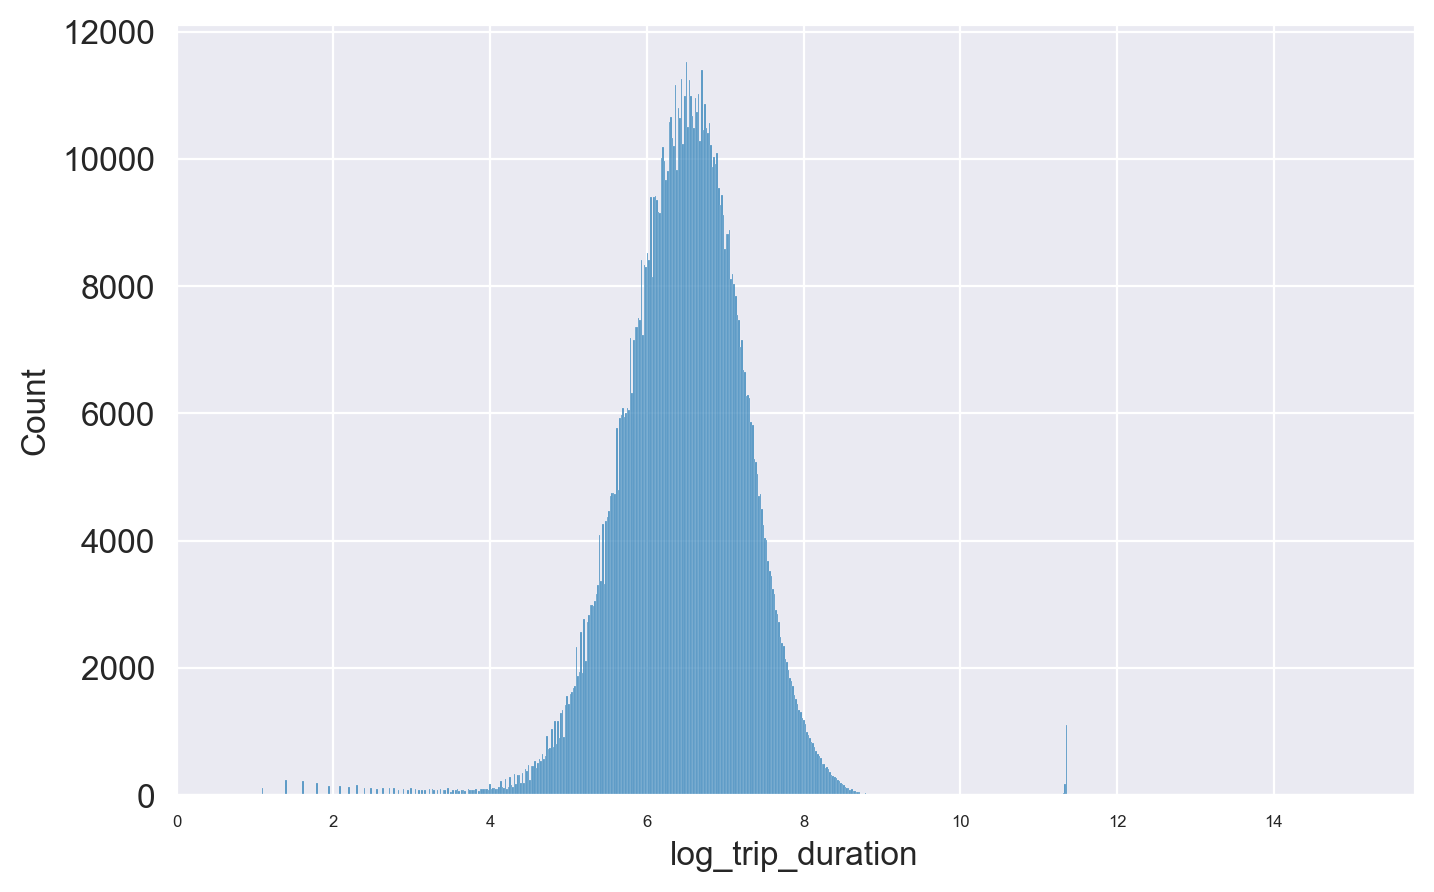

In [71]:
sns.histplot(data=y_train)
plt.show()

In [72]:
X_train = X_train[y_train < np.log1p(60 * 60 * 5)]
y_train = y_train[y_train < np.log1p(60 * 60 * 5)]

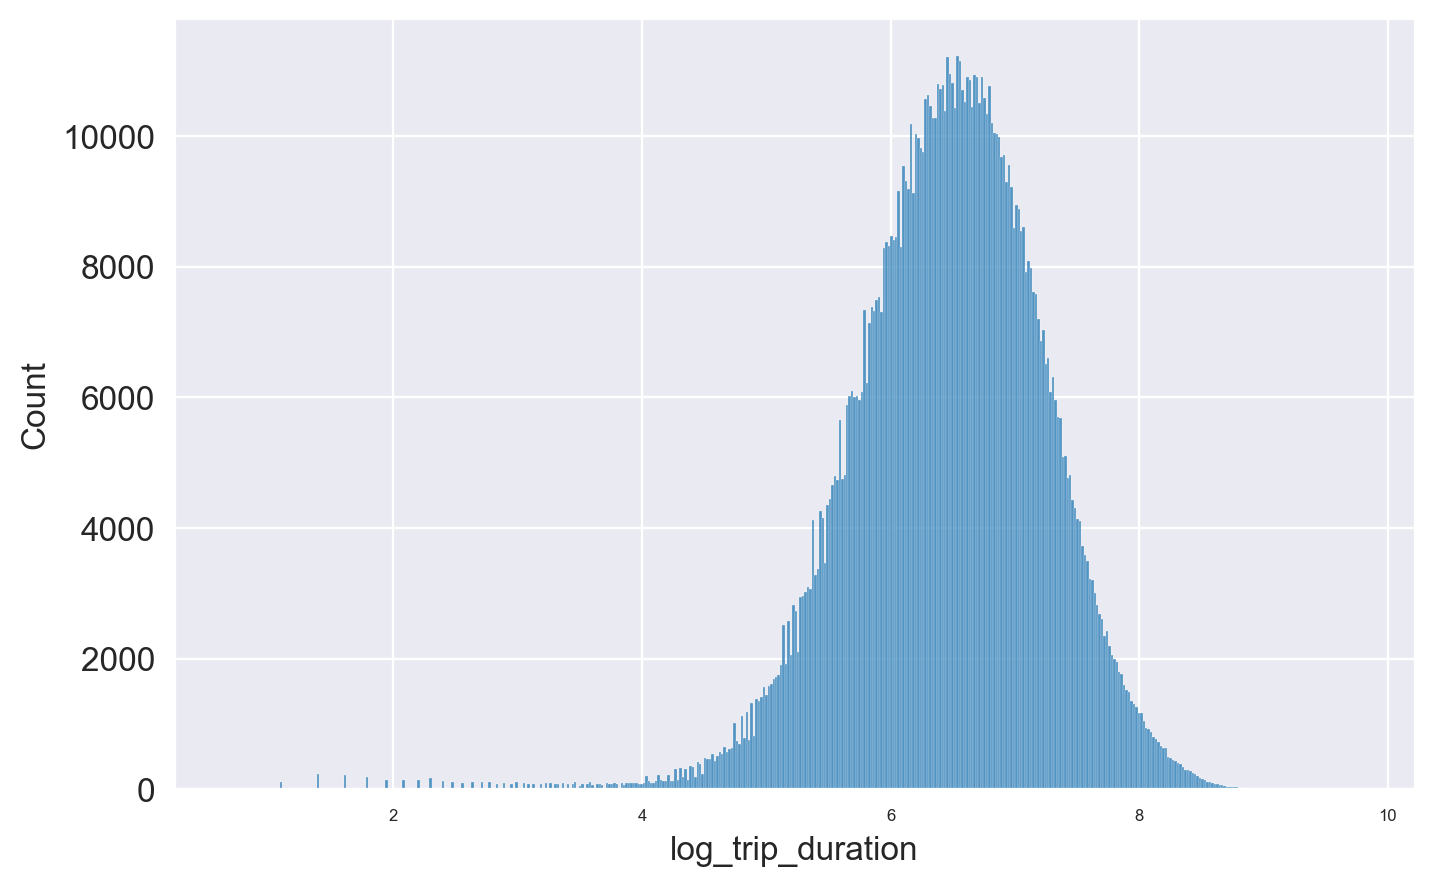

In [73]:
sns.histplot(data=y_train)
plt.show()

In [74]:
y_train = y_train[X_train['haversine'] < 25]
X_train = X_train[X_train['haversine'] < 25]

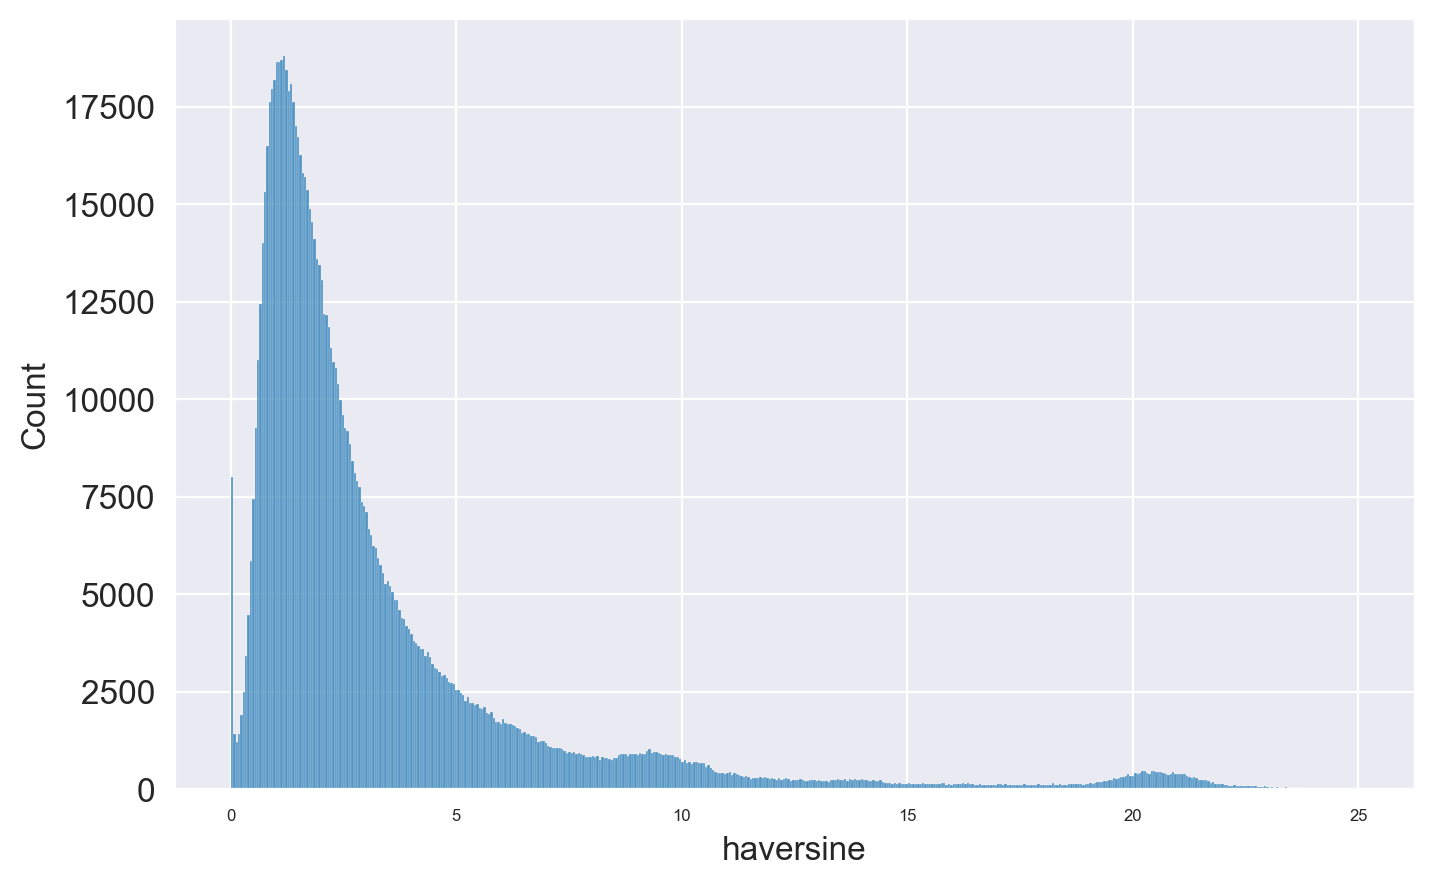

In [75]:
sns.histplot(x=X_train['haversine'])
plt.show()

In [78]:
X_train.head()

id     pickup_datetime  pickup_longitude  pickup_latitude  \
1183110  id2786385 2016-05-13 18:10:09        -73.987053        40.725471   
1415769  id3037797 2016-03-20 02:03:36        -73.971756        40.761894   
940140   id2349575 2016-01-07 22:09:04        -73.986534        40.742668   
1263734  id3905543 2016-05-31 15:11:44        -73.982246        40.768192   
145592   id1627565 2016-04-12 11:21:10        -73.963974        40.775284   

         dropoff_longitude  dropoff_latitude  weekday  month  hour  \
1183110         -73.999504         40.728611        4      5    18   
1415769         -73.982124         40.755253        6      3     2   
940140          -74.007301         40.741310        3      1    22   
1263734         -73.976479         40.785740        1      5    15   
145592          -73.960594         40.780769        1      4    11   

         is_anomal_first  ...  haversine  haversine_log  busy_traffic  \
1183110            False  ...   1.105768       0.744680         False   
1415769            False  ...   1.143679       0.762523         False   
940140             False  ...   1.756091       1.013813         False   
1263734            False  ...   2.010740       1.102186          True   
145592             False  ...   0.673087       0.514670          True   

         light_traffic  from_small_airport  to_small_airport  \
1183110          False               False             False   
1415769          False               False             False   
940140           False               False             False   
1263734          False               False             False   
145592           False               False             False   

         from_big_airport  to_big_airport  pickup_point  dropoff_point  
1183110             False           False          10.0           16.0  
1415769             False           False          44.0           35.0  
940140              False           False          26.0           -1.0  
1263734             False           False          51.0           -1.0  
145592              False           False          61.0           61.0  

[5 rows x 22 columns]

In [79]:
numeric_features = ['haversine', 'haversine_log']
categorical_features = ['weekday', 'month', 'hour', 'is_anomal_first', 'is_anomal_second', 'day_of_year',
                        'busy_traffic', 'light_traffic', 'from_small_airport', 'to_small_airport', 'from_big_airport',
                        'to_big_airport', 'pickup_point', 'dropoff_point']

ridge = make_first_pipeline(numeric_features, categorical_features)

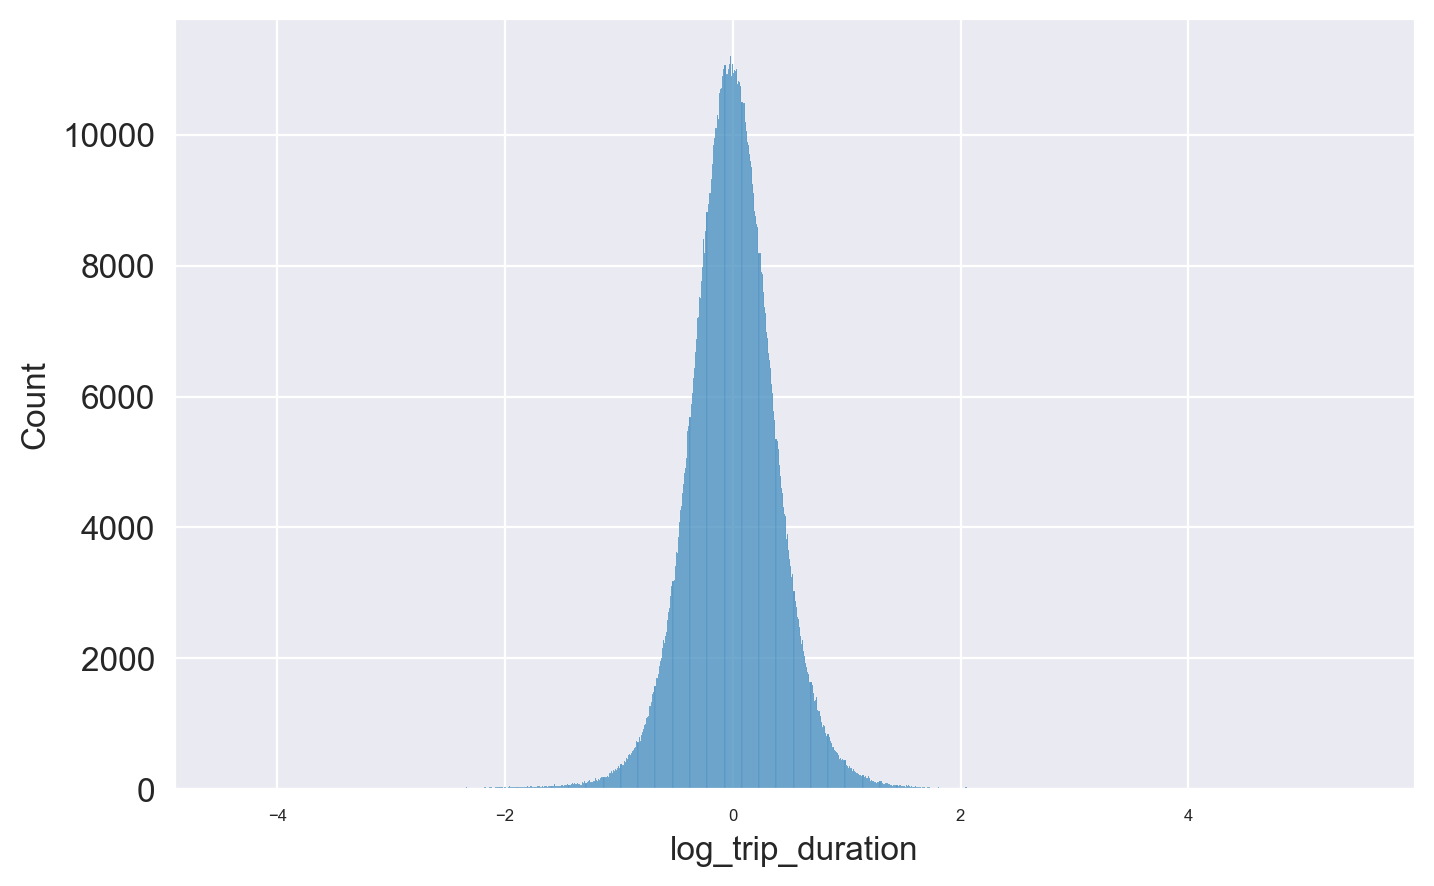

In [80]:
ridge.fit(X_train, y_train)
train_y_pred = ridge.predict(X_train)

reg_delta = train_y_pred - y_train
sns.histplot(x=reg_delta)
plt.show()

In [81]:
X_train = X_train[(reg_delta < 2) & (reg_delta > -2)]
y_train = y_train[(reg_delta < 2) & (reg_delta > -2)]

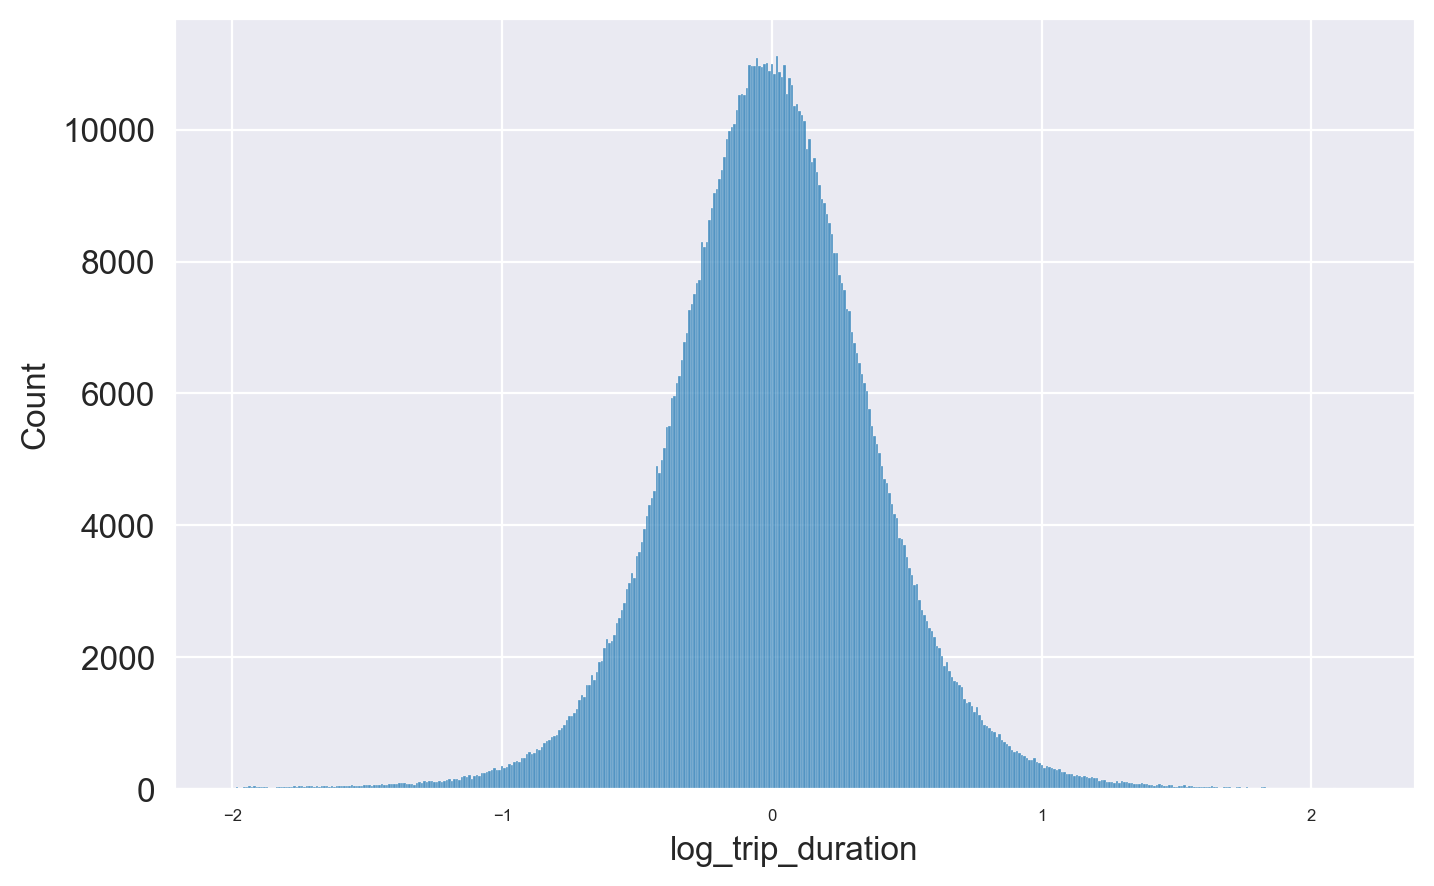

In [82]:
ridge.fit(X_train, y_train)
train_y_pred = ridge.predict(X_train)

reg_delta = train_y_pred - y_train
sns.histplot(x=reg_delta)
plt.show()

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [83]:
categorical_features = ['weekday', 'month', 'hour', 'is_anomal_first', 'is_anomal_second', 'day_of_year',
                        'busy_traffic', 'light_traffic', 'from_small_airport', 'to_small_airport', 'from_big_airport',
                        'to_big_airport', 'pickup_point', 'dropoff_point']

for feature in categorical_features:
    print(feature)
    value_counts = X_train[feature].value_counts()
    print(value_counts.to_dict())
    print()

weekday
{4: 155381, 5: 153702, 3: 152289, 2: 146133, 1: 140892, 6: 135984, 0: 130053}

month
{3: 177912, 4: 175052, 5: 173135, 2: 165877, 6: 162769, 1: 159689}

hour
{18: 62948, 19: 62839, 21: 58432, 20: 58372, 22: 55997, 17: 53243, 14: 51694, 12: 50137, 15: 49977, 13: 49811, 23: 48617, 11: 47547, 9: 46968, 8: 46833, 10: 45674, 16: 44626, 7: 38593, 0: 36891, 1: 26885, 6: 23054, 2: 19495, 3: 14478, 4: 10899, 5: 10424}

is_anomal_first
{False: 997898, True: 16536}

is_anomal_second
{False: 1006128, True: 8306}

day_of_year
{100: 6768, 107: 6756, 65: 6673, 93: 6558, 128: 6544, 106: 6459, 64: 6449, 99: 6449, 58: 6426, 44: 6423, 127: 6399, 42: 6398, 78: 6386, 142: 6369, 30: 6366, 135: 6346, 43: 6334, 72: 6330, 79: 6326, 57: 6273, 51: 6248, 71: 6214, 126: 6214, 156: 6206, 105: 6203, 37: 6195, 63: 6183, 121: 6157, 16: 6137, 141: 6110, 50: 6104, 22: 6089, 120: 6071, 29: 6062, 98: 6049, 62: 6014, 92: 5998, 49: 5997, 133: 5994, 9: 5984, 56: 5964, 136: 5957, 168: 5952, 125: 5942, 140: 5940, 35: 5

Действительно редкие только точки подбора и высадки

In [84]:
rare_pickup = X_train['pickup_point'].value_counts()[X_train['pickup_point'].value_counts() < 50].index
rare_dropoff = X_train['dropoff_point'].value_counts()[X_train['dropoff_point'].value_counts() < 50].index


def union_rare_features(X):
    X.loc[X['pickup_point'].isin(rare_pickup), 'pickup_point'] = -2
    X.loc[X['dropoff_point'].isin(rare_dropoff), 'dropoff_point'] = -2


rare_dropoff

Float64Index([56.0, 21.0, 29.0, 57.0], dtype='float64')

In [85]:
union_rare_features(X_train)
union_rare_features(X_test)
X_train['pickup_point'].value_counts().iloc[-5:]

 23.0    103
 38.0     90
 12.0     64
 47.0     56
-2.0      27
Name: pickup_point, dtype: int64

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [86]:
numeric_features = ['haversine', 'haversine_log']
categorical_features = ['weekday', 'month', 'hour', 'is_anomal_first', 'is_anomal_second', 'day_of_year',
                        'busy_traffic', 'light_traffic', 'from_small_airport', 'to_small_airport', 'from_big_airport',
                        'to_big_airport', 'pickup_point', 'dropoff_point']
ridge = make_first_pipeline(numeric_features, categorical_features)

In [87]:
ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['haversine',
                                                   'haversine_log']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['weekday', 'month', 'hour',
                                                   'is_anomal_first',
                                                   'is_anomal_second',
                                                   'day_of_year',
                                                   'busy_traffic',
                                                   'light_traffic',
                                                   'from_small_airport',
                                                   'to_small_airport',
                                                   'from_big_airport',
                                                   'to_big_airport',
                                                   'pickup_point',
                                                   'dropoff_point'])])),
                ('regression', Ridge())])

In [88]:
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Ridge MSE:', mse)

Ridge MSE: 0.21426910496314464


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [89]:
print('Count of features before OHE:', len(X_train.columns))
print('Count of features after OHE:', len(ridge[:-1].get_feature_names_out()))

Count of features before OHE: 22
Count of features after OHE: 358


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [90]:
from sklearn.linear_model import Lasso


def make_second_pipeline(numeric_features, categorical_features, reg=1.0):
    categorical_transformer = Pipeline(steps=[
        ('ohe', OneHotEncoder(handle_unknown='ignore'))])
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    lasso = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regression', Lasso(alpha=reg))])
    return lasso

In [91]:
numeric_features = ['haversine', 'haversine_log']
categorical_features = ['weekday', 'month', 'hour', 'is_anomal_first', 'is_anomal_second', 'day_of_year',
                        'busy_traffic', 'light_traffic', 'from_small_airport', 'to_small_airport', 'from_big_airport',
                        'to_big_airport', 'pickup_point', 'dropoff_point']

lasso = make_second_pipeline(numeric_features, categorical_features)

In [92]:
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Lasso MSE:', mse)

Lasso MSE: 0.6329543571404027


Пока что Ridge лучше в разы

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [93]:
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, train_size=0.8)
X_train_train.head()

id     pickup_datetime  pickup_longitude  pickup_latitude  \
1136998  id2355665 2016-05-05 23:41:52        -73.980141        40.761799   
741521   id0662144 2016-06-11 14:16:52        -73.960602        40.775757   
88076    id0872432 2016-01-17 11:44:13        -74.005524        40.727364   
992267   id3374921 2016-02-18 23:15:37        -73.863632        40.769821   
1294161  id0966506 2016-06-05 12:40:35        -74.010284        40.712063   

         dropoff_longitude  dropoff_latitude  weekday  month  hour  \
1136998         -73.924690         40.765560        3      5    23   
741521          -74.003624         40.732224        5      6    14   
88076           -74.011452         40.713570        6      1    11   
992267          -73.951859         40.777729        3      2    23   
1294161         -74.002228         40.729408        6      6    12   

         is_anomal_first  ...  haversine  haversine_log  busy_traffic  \
1136998            False  ...   4.688729       1.738487         False   
741521             False  ...   6.046864       1.952583         False   
88076               True  ...   1.613127       0.960548         False   
992267             False  ...   7.481152       2.137846         False   
1294161            False  ...   2.044743       1.113416         False   

         light_traffic  from_small_airport  to_small_airport  \
1136998          False               False             False   
741521           False               False             False   
88076            False               False             False   
992267           False                True             False   
1294161          False               False             False   

         from_big_airport  to_big_airport  pickup_point  dropoff_point  
1136998             False           False          43.0           -1.0  
741521              False           False          61.0           16.0  
88076               False           False          16.0           -1.0  
992267              False           False          -1.0           63.0  
1294161             False           False          -1.0           16.0  

[5 rows x 22 columns]

In [94]:
alphas_lasso = np.logspace(-4, -1.85, num=10)
alphas_ridge = np.logspace(1, 4, num=10)

print('Alphas lasso:', alphas_lasso)
print('Alphas ridge:', alphas_ridge)

loss_by_alpha_lasso = []

loss_by_alpha_ridge = []

fitted_lassos = []

for reg in alphas_ridge:
    ridge = make_first_pipeline(numeric_features, categorical_features, reg)

    ridge.fit(X_train_train, y_train_train)
    y_pred_ridge = ridge.predict(X_train_val)

    mse_ridge = mean_squared_error(y_train_val, y_pred_ridge)
    loss_by_alpha_ridge.append((reg, mse_ridge))

    print('Ridge MSE:', mse_ridge)

for reg in alphas_lasso:
    lasso = make_second_pipeline(numeric_features, categorical_features, reg)

    lasso.fit(X_train_train, y_train_train)
    y_pred_lasso = lasso.predict(X_train_val)

    mse_lasso = mean_squared_error(y_train_val, y_pred_lasso)
    loss_by_alpha_lasso.append((reg, mse_lasso))

    fitted_lassos.append(lasso)

    print('Lasso MSE:', mse_lasso)

Alphas lasso: [0.0001     0.00017334 0.00030045 0.00052079 0.00090273 0.00156475
 0.00271227 0.00470135 0.00814913 0.01412538]
Alphas ridge: [   10.            21.5443469     46.41588834   100.
   215.443469     464.15888336  1000.          2154.43469003
  4641.58883361 10000.        ]
Ridge MSE: 0.15182746370802724
Ridge MSE: 0.15182658976094965
Ridge MSE: 0.15182545090548744
Ridge MSE: 0.15189500534070388
Ridge MSE: 0.15190116148716837
Ridge MSE: 0.1519817198415257
Ridge MSE: 0.15211018050084824
Ridge MSE: 0.15256959725666727
Ridge MSE: 0.15371129344971124
Ridge MSE: 0.15642389158242292
Lasso MSE: 0.15221966211451846
Lasso MSE: 0.1527963851625615
Lasso MSE: 0.15363139205066195
Lasso MSE: 0.1548864728787563
Lasso MSE: 0.15682641522011434
Lasso MSE: 0.1598739998866178
Lasso MSE: 0.16457284837424482
Lasso MSE: 0.1718472368587358
Lasso MSE: 0.17914312093370613
Lasso MSE: 0.18734675936786802


In [95]:
print('Best alpha, mse for ridge:')
print(sorted(loss_by_alpha_ridge, key=lambda x: x[1])[0])

print('Best alpha, mse for lasso:')
print(sorted(loss_by_alpha_lasso, key=lambda x: x[1])[0])

Best alpha, mse for ridge:
(46.41588833612777, 0.15182545090548744)
Best alpha, mse for lasso:
(0.0001, 0.15221966211451846)


Опытным путем выяснил, что тут lasso хочет маленькие альфа и медленно обучается при них (меньше 10e-4 ооооочень долго), а ridge очень слабо зависит от альфы

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

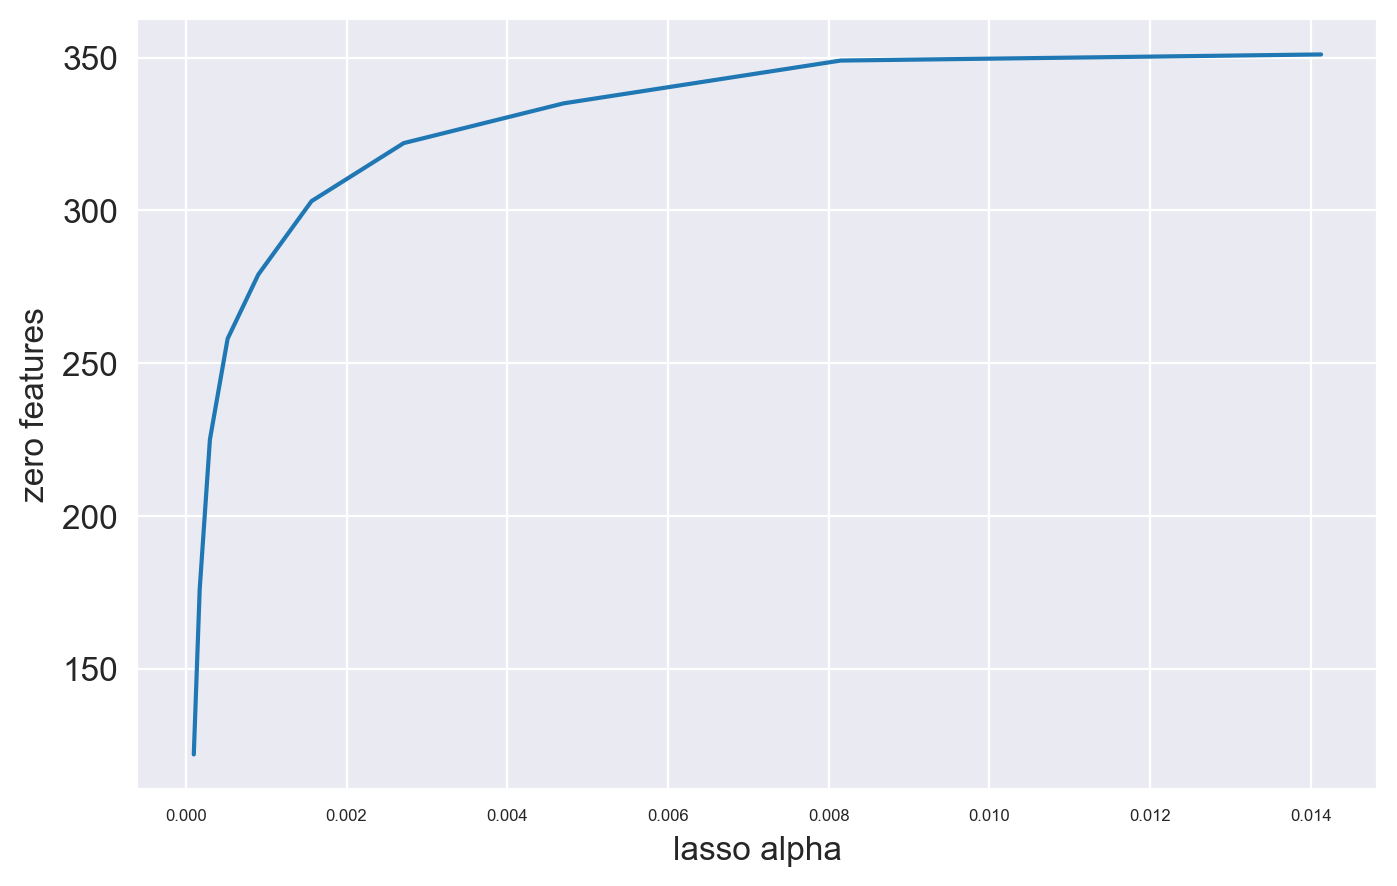

In [96]:
x = []
y = []

for alpha, lasso in zip(alphas_lasso, fitted_lassos):
    y_pred_lasso = lasso.predict(X_train_val)
    mse_lasso = mean_squared_error(y_train_val, y_pred_lasso)
    weights = lasso['regression'].coef_

    x.append(alpha)
    y.append(len(weights[weights == 0]))

plt.gca().set_ylabel('zero features')
plt.gca().set_xlabel('lasso alpha')

plt.plot(x, y)
plt.show()

Всего признаков после OHE 358, половина это 179. Видно, что уже на второй альфе (0.00017334) занулено больше 200 весов


In [97]:
y_pred_lasso = fitted_lassos[1].predict(X_train_val)
mse_lasso = mean_squared_error(y_train_val, y_pred_lasso)

ridge = make_first_pipeline(numeric_features, categorical_features, 46.415888)
ridge.fit(X_train_train, y_train_train)

y_pred_ridge = ridge.predict(X_train_val)
mse_ridge = mean_squared_error(y_train_val, y_pred_ridge)

print('MSE delta:', mse_lasso - mse_ridge)

MSE delta: 0.0009006283853081609


По сравнению с лучшим Ridge, мы, занулив больше половины признаков, потеряли всего чуть меньше 1/1000

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?
**Ответ**: Признак полезен, так как он позволит точнее оценивать продолжительность поездки по какому-то определенному известному маршруту из А в В. Модель не вытаскивает информацию, так как она не может замечать связь между своими признаками. Что точка начала поездки, что точка конца, рассматриваются в отдельности моделью, и для каждого признака формируется вес, который интерпретируется как: если поездка началась в этой точке, то ее длительность увеличится/уменьшится на вес этой точки после OHE. С новым признаком модель будет именно изучать маршрут целиком и давать вес как бы этому маршруту.

In [98]:
X_train.head()

id     pickup_datetime  pickup_longitude  pickup_latitude  \
1183110  id2786385 2016-05-13 18:10:09        -73.987053        40.725471   
1415769  id3037797 2016-03-20 02:03:36        -73.971756        40.761894   
940140   id2349575 2016-01-07 22:09:04        -73.986534        40.742668   
1263734  id3905543 2016-05-31 15:11:44        -73.982246        40.768192   
145592   id1627565 2016-04-12 11:21:10        -73.963974        40.775284   

         dropoff_longitude  dropoff_latitude  weekday  month  hour  \
1183110         -73.999504         40.728611        4      5    18   
1415769         -73.982124         40.755253        6      3     2   
940140          -74.007301         40.741310        3      1    22   
1263734         -73.976479         40.785740        1      5    15   
145592          -73.960594         40.780769        1      4    11   

         is_anomal_first  ...  haversine  haversine_log  busy_traffic  \
1183110            False  ...   1.105768       0.744680         False   
1415769            False  ...   1.143679       0.762523         False   
940140             False  ...   1.756091       1.013813         False   
1263734            False  ...   2.010740       1.102186          True   
145592             False  ...   0.673087       0.514670          True   

         light_traffic  from_small_airport  to_small_airport  \
1183110          False               False             False   
1415769          False               False             False   
940140           False               False             False   
1263734          False               False             False   
145592           False               False             False   

         from_big_airport  to_big_airport  pickup_point  dropoff_point  
1183110             False           False          10.0           16.0  
1415769             False           False          44.0           35.0  
940140              False           False          26.0           -1.0  
1263734             False           False          51.0           -1.0  
145592              False           False          61.0           61.0  

[5 rows x 22 columns]

In [99]:
X_train['start_stop'] = X_train['pickup_point'].astype('str') + '_' + X_train['dropoff_point'].astype('str')
X_test['start_stop'] = X_test['pickup_point'].astype('str') + '_' + X_test['dropoff_point'].astype('str')
X_train.head()

id     pickup_datetime  pickup_longitude  pickup_latitude  \
1183110  id2786385 2016-05-13 18:10:09        -73.987053        40.725471   
1415769  id3037797 2016-03-20 02:03:36        -73.971756        40.761894   
940140   id2349575 2016-01-07 22:09:04        -73.986534        40.742668   
1263734  id3905543 2016-05-31 15:11:44        -73.982246        40.768192   
145592   id1627565 2016-04-12 11:21:10        -73.963974        40.775284   

         dropoff_longitude  dropoff_latitude  weekday  month  hour  \
1183110         -73.999504         40.728611        4      5    18   
1415769         -73.982124         40.755253        6      3     2   
940140          -74.007301         40.741310        3      1    22   
1263734         -73.976479         40.785740        1      5    15   
145592          -73.960594         40.780769        1      4    11   

         is_anomal_first  ...  haversine_log  busy_traffic  light_traffic  \
1183110            False  ...       0.744680         False          False   
1415769            False  ...       0.762523         False          False   
940140             False  ...       1.013813         False          False   
1263734            False  ...       1.102186          True          False   
145592             False  ...       0.514670          True          False   

         from_small_airport  to_small_airport  from_big_airport  \
1183110               False             False             False   
1415769               False             False             False   
940140                False             False             False   
1263734               False             False             False   
145592                False             False             False   

         to_big_airport  pickup_point  dropoff_point  start_stop  
1183110           False          10.0           16.0   10.0_16.0  
1415769           False          44.0           35.0   44.0_35.0  
940140            False          26.0           -1.0   26.0_-1.0  
1263734           False          51.0           -1.0   51.0_-1.0  
145592            False          61.0           61.0   61.0_61.0  

[5 rows x 23 columns]

In [100]:
X_train['start_stop'].value_counts()

-1.0_-1.0    91224
42.0_-1.0     9030
44.0_-1.0     8313
43.0_-1.0     8240
59.0_-1.0     7838
             ...  
12.0_11.0        1
20.0_40.0        1
22.0_34.0        1
58.0_4.0         1
15.0_47.0        1
Name: start_stop, Length: 3140, dtype: int64

Возьмем не топ 100, а топ 1100, чтобы число пар, которые станут -1, стало на 2ом месте по частоте этого признака. Проверил, так качество на тесте лучше

In [101]:
top_1100_start_stop = X_train['start_stop'].value_counts()[:1100].index
X_train.loc[~X_train['start_stop'].isin(top_1100_start_stop), 'start_stop'] = '-1'
X_test.loc[~X_test['start_stop'].isin(top_1100_start_stop), 'start_stop'] = '-1'
X_train.head()

id     pickup_datetime  pickup_longitude  pickup_latitude  \
1183110  id2786385 2016-05-13 18:10:09        -73.987053        40.725471   
1415769  id3037797 2016-03-20 02:03:36        -73.971756        40.761894   
940140   id2349575 2016-01-07 22:09:04        -73.986534        40.742668   
1263734  id3905543 2016-05-31 15:11:44        -73.982246        40.768192   
145592   id1627565 2016-04-12 11:21:10        -73.963974        40.775284   

         dropoff_longitude  dropoff_latitude  weekday  month  hour  \
1183110         -73.999504         40.728611        4      5    18   
1415769         -73.982124         40.755253        6      3     2   
940140          -74.007301         40.741310        3      1    22   
1263734         -73.976479         40.785740        1      5    15   
145592          -73.960594         40.780769        1      4    11   

         is_anomal_first  ...  haversine_log  busy_traffic  light_traffic  \
1183110            False  ...       0.744680         False          False   
1415769            False  ...       0.762523         False          False   
940140             False  ...       1.013813         False          False   
1263734            False  ...       1.102186          True          False   
145592             False  ...       0.514670          True          False   

         from_small_airport  to_small_airport  from_big_airport  \
1183110               False             False             False   
1415769               False             False             False   
940140                False             False             False   
1263734               False             False             False   
145592                False             False             False   

         to_big_airport  pickup_point  dropoff_point  start_stop  
1183110           False          10.0           16.0   10.0_16.0  
1415769           False          44.0           35.0   44.0_35.0  
940140            False          26.0           -1.0   26.0_-1.0  
1263734           False          51.0           -1.0   51.0_-1.0  
145592            False          61.0           61.0          -1  

[5 rows x 23 columns]

In [102]:
X_train['start_stop'].value_counts()

-1.0_-1.0    91224
-1           57985
42.0_-1.0     9030
44.0_-1.0     8313
43.0_-1.0     8240
             ...  
42.0_11.0      136
19.0_63.0      136
41.0_10.0      136
59.0_24.0      135
45.0_60.0      135
Name: start_stop, Length: 1101, dtype: int64

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых данных и посчитайте качество на тестовой выборке

In [103]:
numeric_features = ['haversine', 'haversine_log']
categorical_features = ['weekday', 'month', 'hour', 'is_anomal_first', 'is_anomal_second', 'day_of_year',
                        'busy_traffic', 'light_traffic', 'from_small_airport', 'to_small_airport', 'from_big_airport',
                        'to_big_airport', 'pickup_point', 'dropoff_point', 'start_stop']

ridge = make_first_pipeline(numeric_features, categorical_features)
ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['haversine',
                                                   'haversine_log']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['weekday', 'month', 'hour',
                                                   'is_anomal_first',
                                                   'is_anomal_second',
                                                   'day_of_year',
                                                   'busy_traffic',
                                                   'light_traffic',
                                                   'from_small_airport',
                                                   'to_small_airport',
                                                   'from_big_airport',
                                                   'to_big_airport',
                                                   'pickup_point',
                                                   'dropoff_point',
                                                   'start_stop'])])),
                ('regression', Ridge())])

In [104]:
y_pred = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred)
print('Final ridge MSE:', mse_ridge)

Final ridge MSE: 0.19959698670779832


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [105]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [106]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

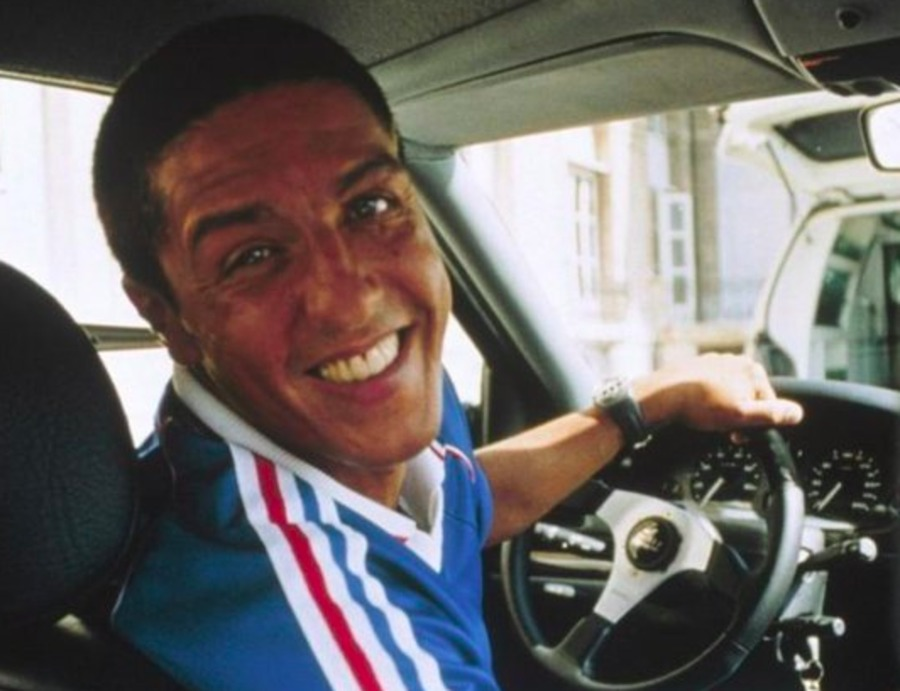

In [126]:
from IPython import display
# display.Image("pic.jpg")

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

Ради интереса сделал сабмишн на kaggle (получил качество 0.45)

In [106]:
add_dt_features(df)
add_haversine(df)
add_airport_features(df)
add_haversine_log(df)
add_traffic_features(df)
y = df['log_trip_duration']
df = df.drop('log_trip_duration', axis=1)
df = mg_transformer.transform(df)
df['start_stop'] = df['pickup_point'].astype('str') + '_' + df['dropoff_point'].astype('str')
top_1100_start_stop = df['start_stop'].value_counts()[:1100].index
df.loc[~df['start_stop'].isin(top_1100_start_stop), 'start_stop'] = '-1'

numeric_features = ['haversine', 'haversine_log']
categorical_features = ['weekday', 'month', 'hour', 'is_anomal_first', 'is_anomal_second', 'day_of_year',
                        'busy_traffic', 'light_traffic', 'from_small_airport', 'to_small_airport', 'from_big_airport',
                        'to_big_airport', 'pickup_point', 'dropoff_point', 'start_stop']

ridge = make_first_pipeline(numeric_features, categorical_features)
ridge.fit(df, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['haversine',
                                                   'haversine_log']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['weekday', 'month', 'hour',
                                                   'is_anomal_first',
                                                   'is_anomal_second',
                                                   'day_of_year',
                                                   'busy_traffic',
                                                   'light_traffic',
                                                   'from_small_airport',
                                                   'to_small_airport',
                                                   'from_big_airport',
                                                   'to_big_airport',
                                                   'pickup_point',
                                                   'dropoff_point',
                                                   'start_stop'])])),
                ('regression', Ridge())])

In [107]:
test = pd.read_csv('test.csv')
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test.head()

add_dt_features(test)
add_haversine(test)
add_airport_features(test)
add_haversine_log(test)
add_traffic_features(test)
test = mg_transformer.transform(test)
test['start_stop'] = test['pickup_point'].astype('str') + '_' + test['dropoff_point'].astype('str')
test.loc[~test['start_stop'].isin(top_1100_start_stop), 'start_stop'] = '-1'

y_pred = ridge.predict(test)
y_pred = np.expm1(y_pred)

res = pd.DataFrame()
res['id'] = test['id']
res['trip_duration'] = y_pred
res.to_csv('res.csv', index=False)
res.head()

id  trip_duration
0  id3004672     890.723949
1  id3505355     554.372391
2  id1217141     439.666455
3  id2150126     938.279418
4  id1598245     333.135641